### NYC NY taxi data EDA

- Q1:Call numbers per hours?
- Q2:Call numbers per weekdays?
- Use GCP Bigquery, data visualization (seaborn, plotly)

In [1]:
# !pip3 install chart-studio cufflinks pandas numpy seaborn matplotlib pandas-gbq

In [2]:
import chart_studio.plotly as py
import cufflinks as cf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
print(cf.__version__)

%config InlineBackend.figure_format = 'retina'
cf.go_offline()

0.17.3


### 1. Whole trip numbers in January

In [3]:
import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '~/.config/gcloud/application_default_credentials.json'

In [4]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/workspace/AI_Data_Science/mobility-285808-aa8e44818175.json'

In [5]:
# import GCP Client library
from google.cloud import bigquery

In [6]:
#instantiate a client for bigquery service
bigquery_client = bigquery.Client()
bigquery_client

In [7]:
# Query for Bigquery
query = """
SELECT 
    DATETIME_TRUNC(pickup_datetime, hour) as pickup_hour,
    count(*) as cnt
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2018`
WHERE EXTRACT(MONTH from pickup_datetime) = 1
GROUP BY pickup_hour
ORDER BY pickup_hour
"""

In [8]:
# run query and get data from bigquery
query_job = bigquery_client.query(query) #API request

In [9]:
# data into dataframe
df = query_job.to_dataframe()
df.head(100)

,pickup_hour,cnt
0,2001-01-01 00:00:00,10
1,2001-01-01 22:00:00,2
2,2001-01-05 11:00:00,1
3,2001-01-06 06:00:00,1
4,2003-01-01 00:00:00,13
...,...,...
95,2018-01-03 12:00:00,13959
96,2018-01-03 13:00:00,14262
97,2018-01-03 14:00:00,15405
98,2018-01-03 15:00:00,15111


In [10]:
df.tail(10)

,pickup_hour,cnt
804,2019-01-22 22:00:00,4
805,2019-01-23 14:00:00,1
806,2019-01-23 15:00:00,1
807,2019-01-26 03:00:00,2
808,2019-01-29 06:00:00,3
809,2019-01-29 08:00:00,2
810,2019-01-29 09:00:00,1
811,2019-01-29 13:00:00,1
812,2019-01-29 14:00:00,1
813,2019-01-31 14:00:00,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 2 columns):
pickup_hour    814 non-null datetime64[ns]
cnt            814 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 12.8 KB


In [12]:
df['pickup_hour'] = pd.to_datetime(df['pickup_hour'])
df

,pickup_hour,cnt
0,2001-01-01 00:00:00,10
1,2001-01-01 22:00:00,2
2,2001-01-05 11:00:00,1
3,2001-01-06 06:00:00,1
4,2003-01-01 00:00:00,13
...,...,...
809,2019-01-29 08:00:00,2
810,2019-01-29 09:00:00,1
811,2019-01-29 13:00:00,1
812,2019-01-29 14:00:00,1


In [13]:
df = df.set_index('pickup_hour')
df

,cnt
pickup_hour,
2001-01-01 00:00:00,10
2001-01-01 22:00:00,2
2001-01-05 11:00:00,1
2001-01-06 06:00:00,1
2003-01-01 00:00:00,13
...,...
2019-01-29 08:00:00,2
2019-01-29 09:00:00,1
2019-01-29 13:00:00,1


In [14]:
df.iplot(kind='scatter', xTitle='Datetimes', yTitle='Demand', title='NYC Taxi Demand')

## number of trips per date

In [15]:
df['date'] = df.index.date
df

,cnt,date
pickup_hour,,
2001-01-01 00:00:00,10,2001-01-01
2001-01-01 22:00:00,2,2001-01-01
2001-01-05 11:00:00,1,2001-01-05
2001-01-06 06:00:00,1,2001-01-06
2003-01-01 00:00:00,13,2003-01-01
...,...,...
2019-01-29 08:00:00,2,2019-01-29
2019-01-29 09:00:00,1,2019-01-29
2019-01-29 13:00:00,1,2019-01-29


In [16]:
df.groupby(['date'])[['cnt']].sum().iplot()

## Trip numbers per weekdays for every hours

In [17]:
df.head()

,cnt,date
pickup_hour,,
2001-01-01 00:00:00,10,2001-01-01
2001-01-01 22:00:00,2,2001-01-01
2001-01-05 11:00:00,1,2001-01-05
2001-01-06 06:00:00,1,2001-01-06
2003-01-01 00:00:00,13,2003-01-01


In [18]:
df['weekday'] = df.index.weekday
df['hour'] = df.index.hour
df['weeknum'] = df.index.week
df

,cnt,date,weekday,hour,weeknum
pickup_hour,,,,,
2001-01-01 00:00:00,10,2001-01-01,0,0,1
2001-01-01 22:00:00,2,2001-01-01,0,22,1
2001-01-05 11:00:00,1,2001-01-05,4,11,1
2001-01-06 06:00:00,1,2001-01-06,5,6,1
2003-01-01 00:00:00,13,2003-01-01,2,0,1
...,...,...,...,...,...
2019-01-29 08:00:00,2,2019-01-29,1,8,5
2019-01-29 09:00:00,1,2019-01-29,1,9,5
2019-01-29 13:00:00,1,2019-01-29,1,13,5


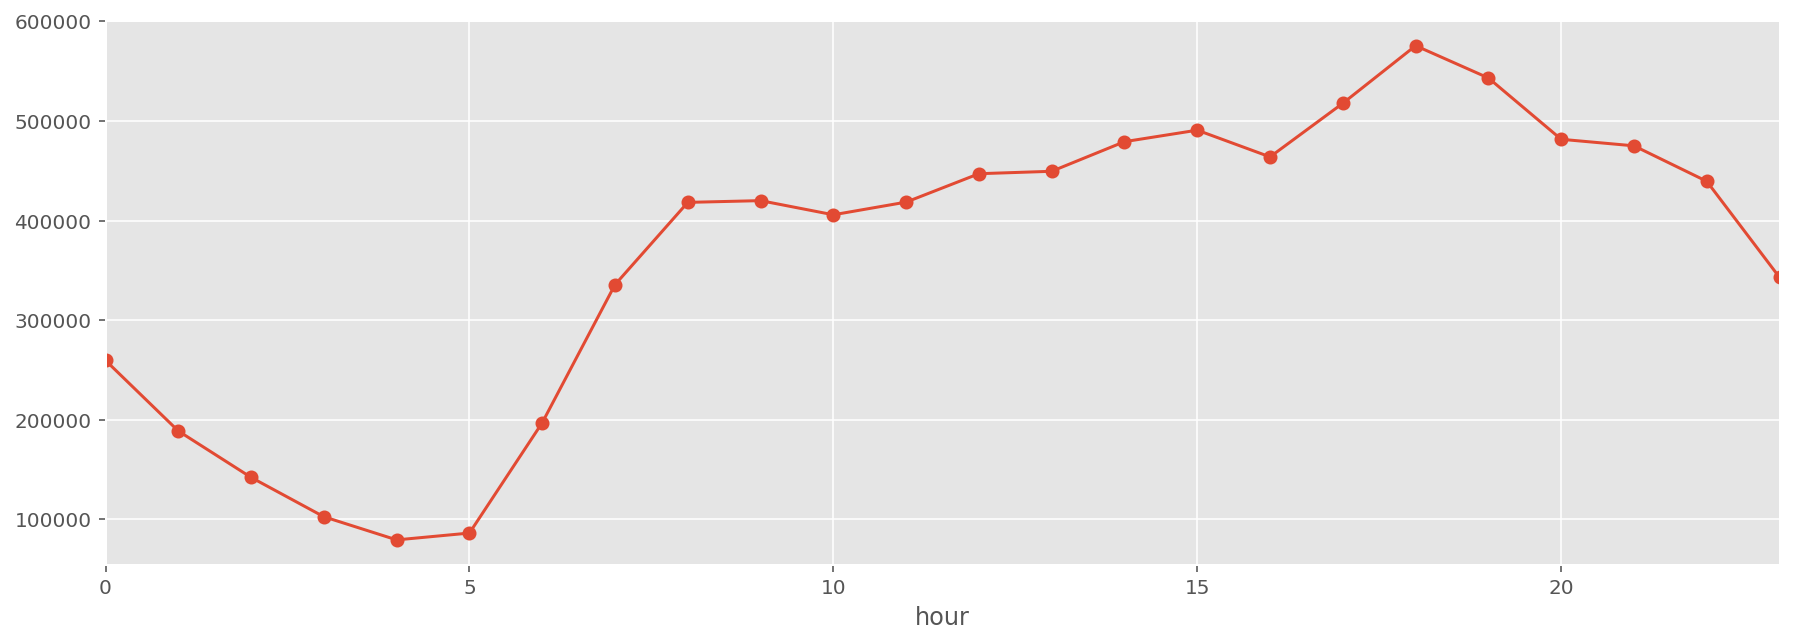

In [19]:
df.groupby('hour')['cnt'].sum().plot(x='hour', y=['cnt'], kind='line', style='-o', figsize=(15,5))

- Pick time : 18 ~ 19 PM
- lowest time : 5 AM

In [20]:
df2= df.groupby('hour')['cnt'].sum()
df2

hour
0     259596
1     188729
2     142119
3     102611
4      79367
5      86229
6     197011
7     335669
8     418310
9     420056
10    405852
11    418578
12    447102
13    449532
14    479266
15    490827
16    463980
17    517837
18    575641
19    543250
20    481664
21    475099
22    439486
23    342980
Name: cnt, dtype: int64

In [21]:
# trip numbers for each hours per weekdays
df.groupby(['hour', 'weekday'])['cnt'].mean().unstack().iplot()
# Wed, Fri have highest trip numbers

In [22]:
# same as pivot table
df[['cnt', 'hour', 'weekday']].pivot_table('cnt', index='hour', columns='weekday', aggfunc='mean').iplot(kind='scatter')

In [23]:
# bar graph
df.groupby(['weekday'])['cnt'].mean().iplot(kind='bar')

- Friday had a highest trip numbers

### weekdays / weekends trip numbers

In [24]:
df['is_weekend'] = ((pd.DatetimeIndex(df.index).dayofweek) // 5 == 1).astype(int)
df['is_weekend']

pickup_hour
2001-01-01 00:00:00    0
2001-01-01 22:00:00    0
2001-01-05 11:00:00    0
2001-01-06 06:00:00    1
2003-01-01 00:00:00    0
                      ..
2019-01-29 08:00:00    0
2019-01-29 09:00:00    0
2019-01-29 13:00:00    0
2019-01-29 14:00:00    0
2019-01-31 14:00:00    0
Name: is_weekend, Length: 814, dtype: int64

In [25]:
4 //5

0

In [26]:
5 // 5

1

In [27]:
10 // 5

2

In [28]:
df.groupby(['hour', 'is_weekend'])['cnt'].mean().unstack().iplot()

### per day / per hour hitmap

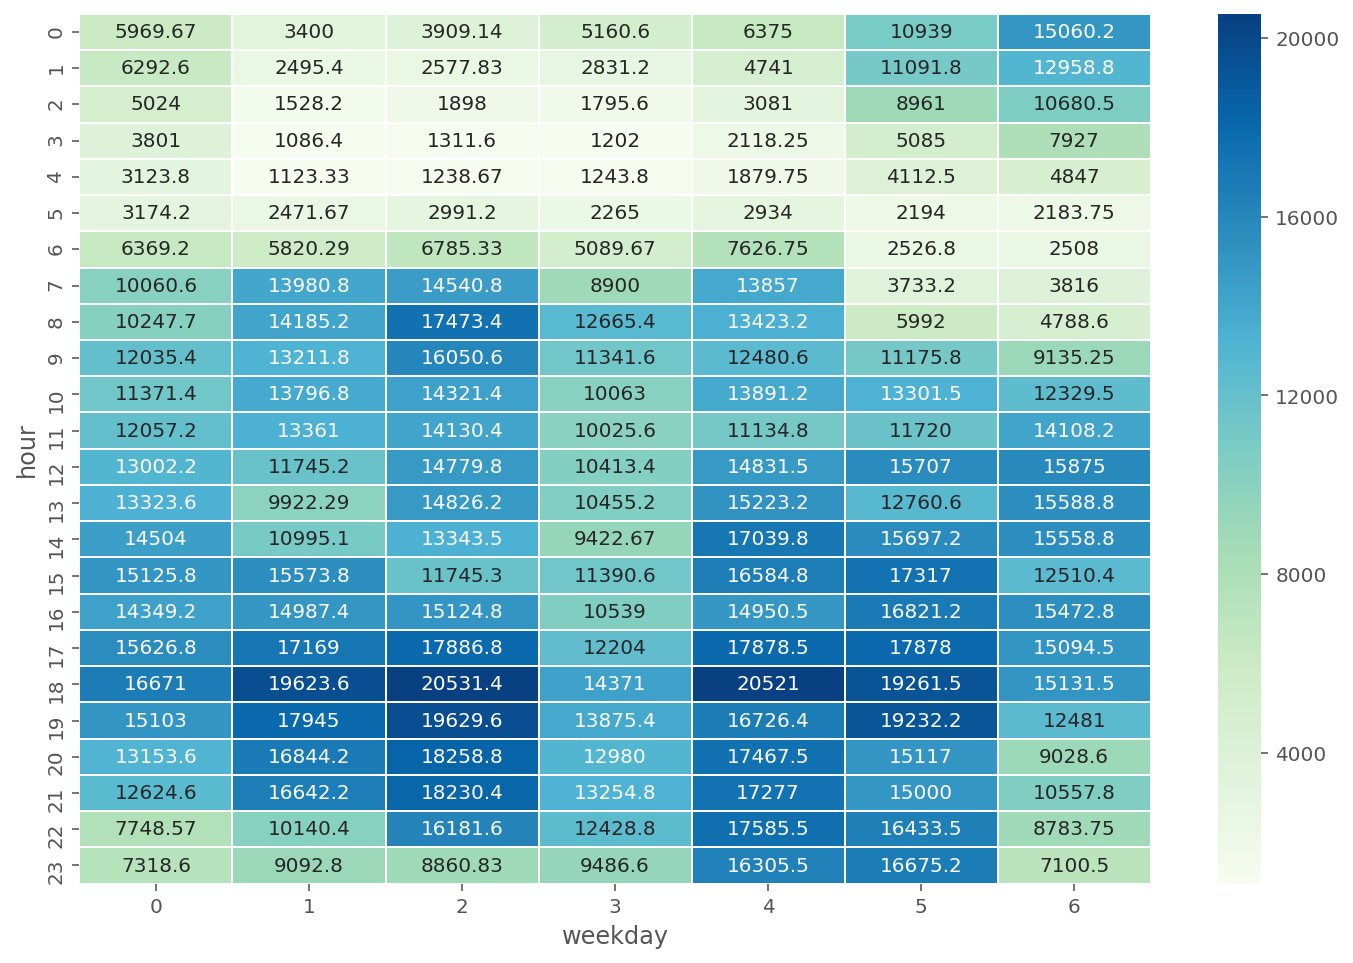

In [29]:
plt.figure(figsize=(12,8))
sns.heatmap(df.groupby(['hour', 'weekday'])['cnt'].mean().unstack(), lw=.5, annot=True, cmap='GnBu', fmt='g', annot_kws={'size':10});

- Trip number increased starting from Friday afternoon

In [30]:
average_df = df.groupby(['is_weekend', 'hour']).mean()['cnt'].unstack(level=0).rename(columns={0:'weekdays', 1:'weekend'})
average_df

is_weekend,weekdays,weekend
hour,,
0,4822.000000,12770.666667
1,3701.080000,12025.250000
2,2648.041667,9820.750000
3,1894.916667,6348.111111
4,1674.192308,4479.750000
5,2748.720000,2188.875000
6,6226.607143,2518.444444
7,12069.560000,3770.000000
8,13496.555556,5390.300000


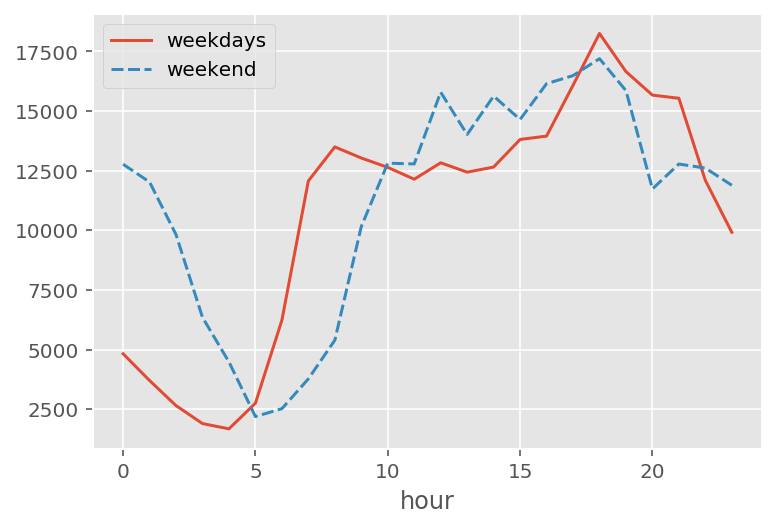

In [31]:
sns.lineplot(data=average_df)

In [32]:
df.head()

,cnt,date,weekday,hour,weeknum,is_weekend
pickup_hour,,,,,,
2001-01-01 00:00:00,10,2001-01-01,0,0,1,0
2001-01-01 22:00:00,2,2001-01-01,0,22,1,0
2001-01-05 11:00:00,1,2001-01-05,4,11,1,0
2001-01-06 06:00:00,1,2001-01-06,5,6,1,1
2003-01-01 00:00:00,13,2003-01-01,2,0,1,0


In [33]:
data = df.groupby(['weekday', 'hour']).mean()['cnt'].unstack(level=0).reset_index()
data = data.melt(id_vars="hour", value_vars=[0,1,2,3,4,5,6], value_name='cnt')

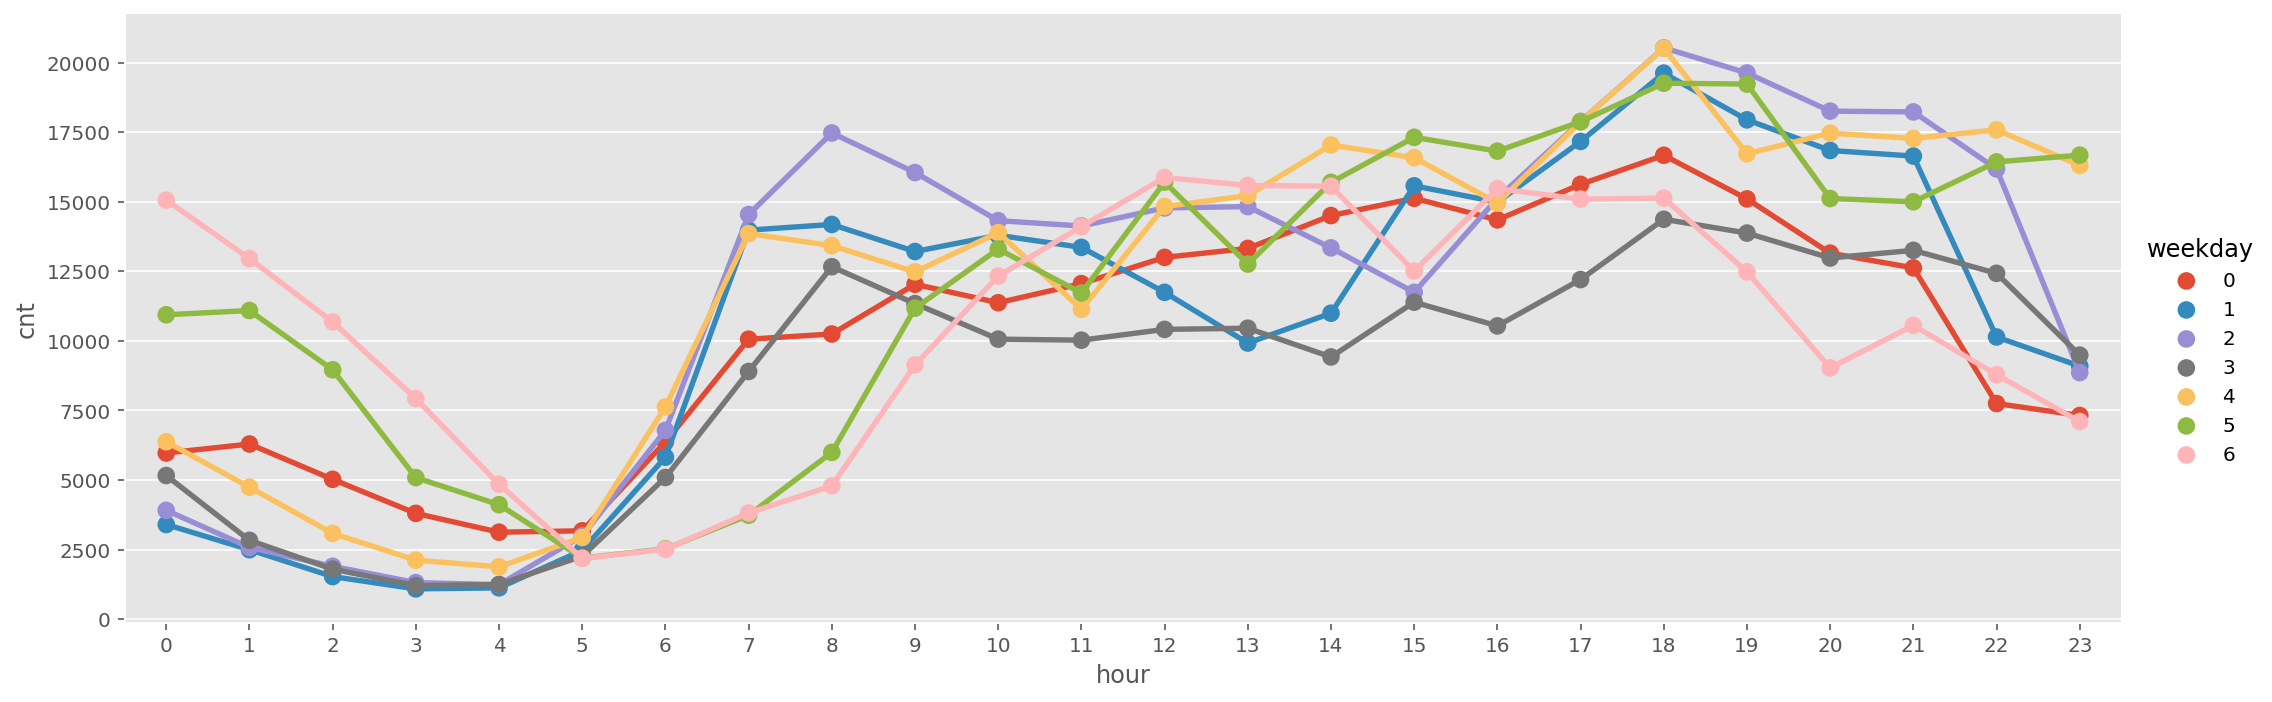

In [34]:
sns.factorplot(x='hour', y='cnt', hue='weekday', data=data, height=5, aspect=3)

### Boxplot
- [Understanding Boxplots](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

Text(0.5, 1.0, 'Hourly box plot')

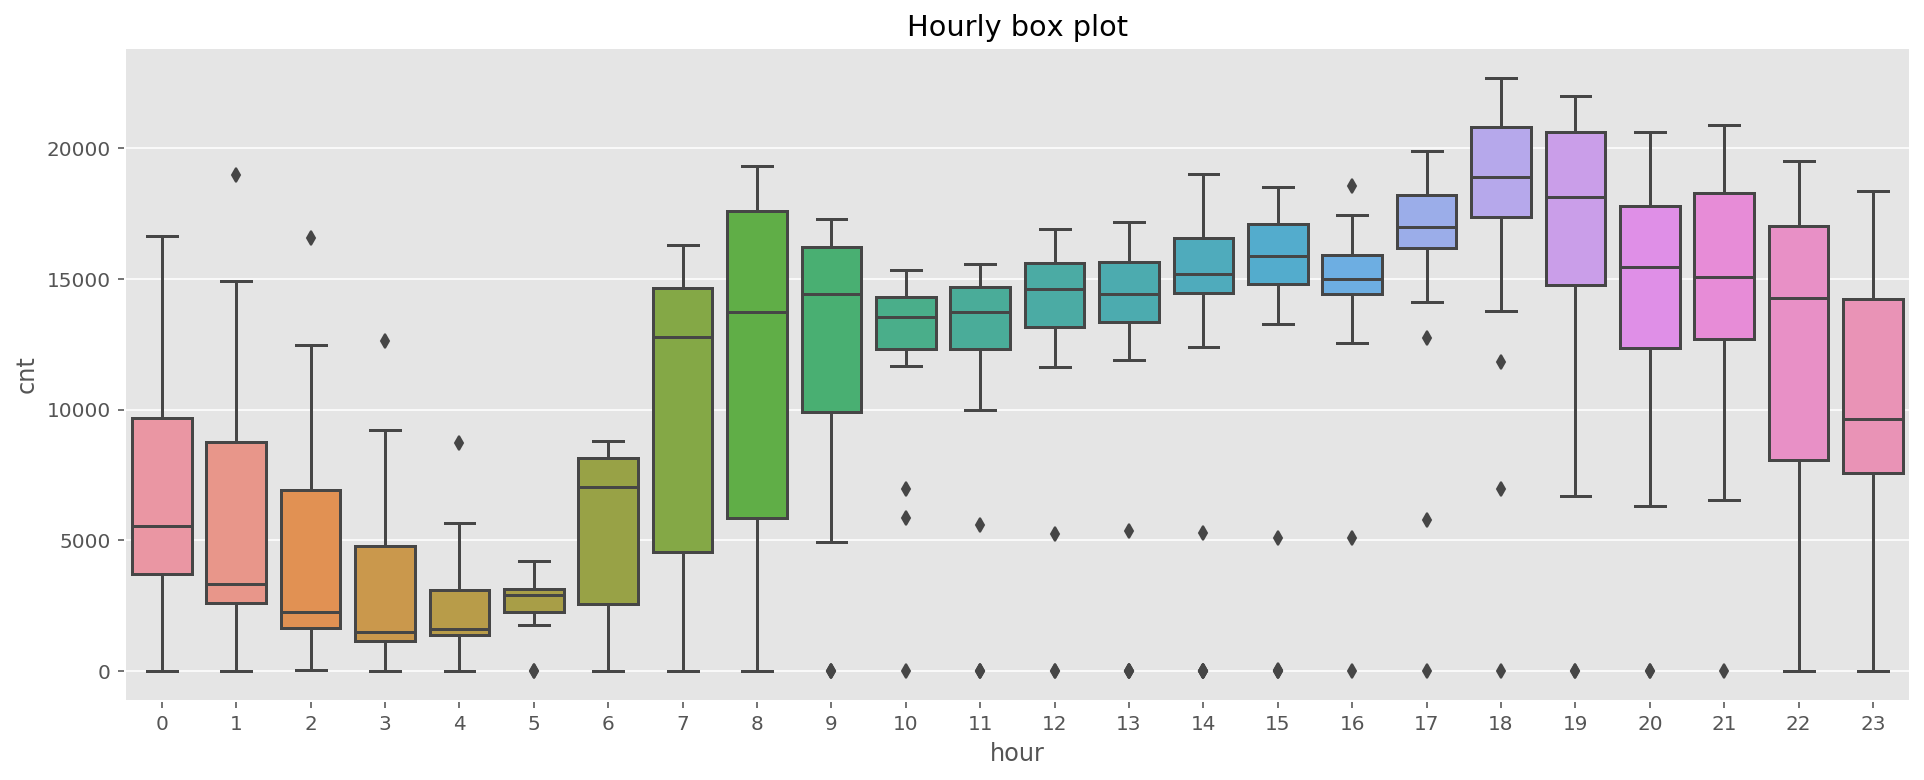

In [35]:
plt.figure(figsize=(16,6))
sns.boxplot(x='hour', y='cnt', data=df)
plt.title('Hourly box plot')

Text(0.5, 1.0, 'Hourly box plot (week 1 data)')

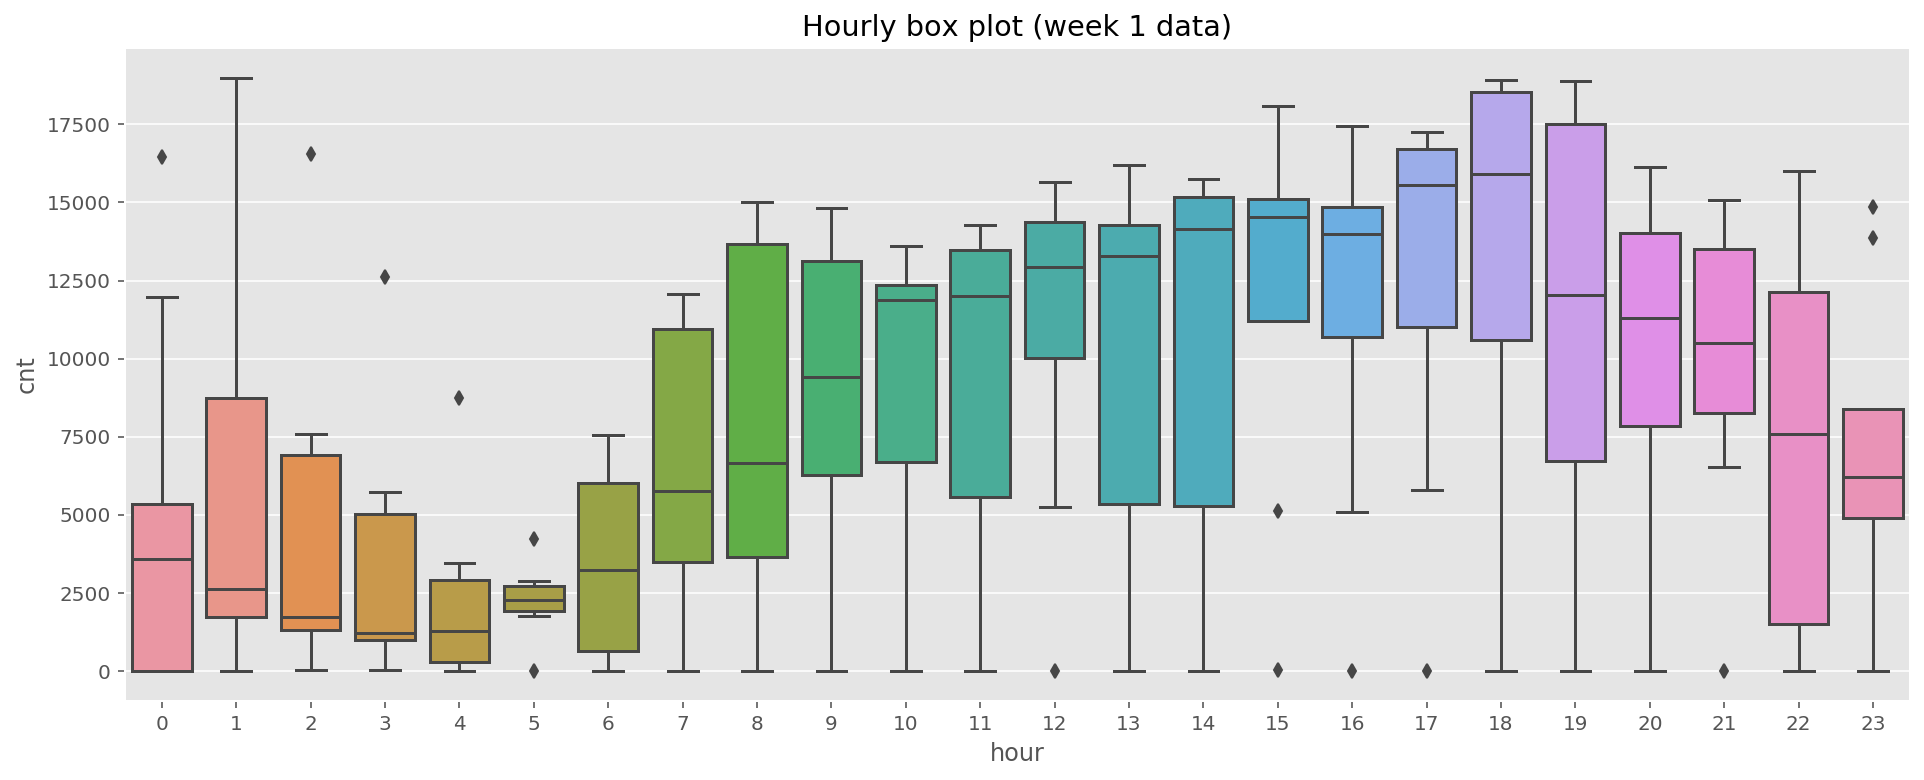

In [36]:
plt.figure(figsize=(16,6))
sns.boxplot(x='hour', y='cnt', data=df[df['weeknum']==1])
plt.title('Hourly box plot (week 1 data)')

Text(0.5, 1.0, 'Hourly box plot (week 2 data)')

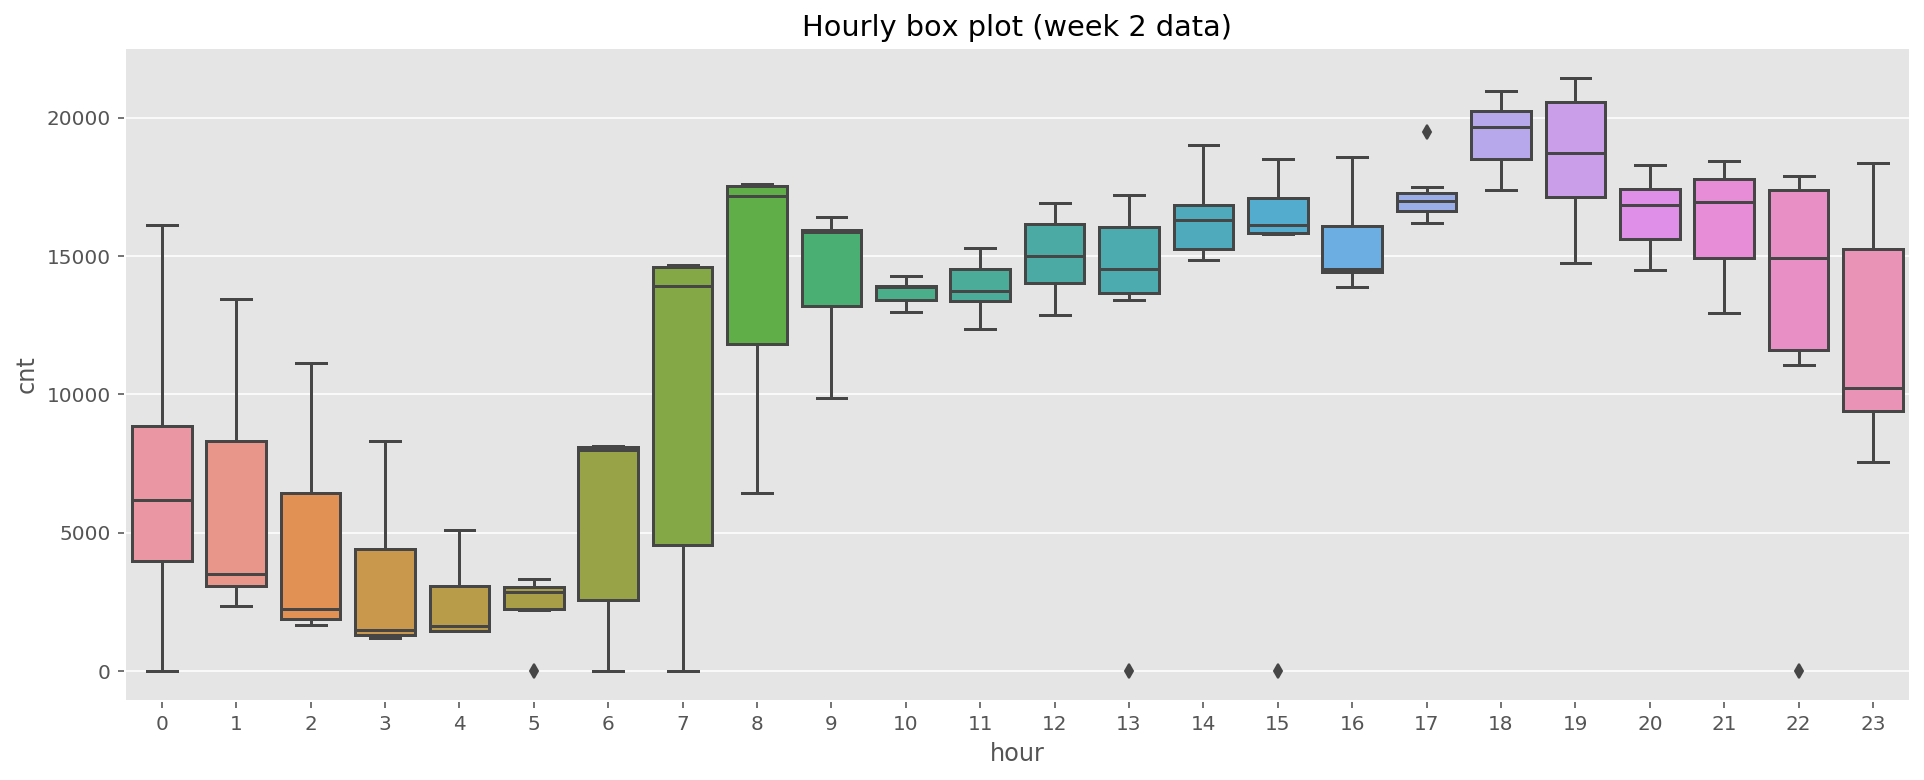

In [37]:
plt.figure(figsize=(16,6))
sns.boxplot(x='hour', y='cnt', data=df[df['weeknum']==2])
plt.title('Hourly box plot (week 2 data)')

In [38]:
def visualize_hourly_boxplot_by_weeknum(df, y, weeknum):
    plt.figure(figsize=(16, 6));
    sns.boxplot(x='hour', y=y, data=df[df['weeknum']==weeknum]);
    plt.title(f"Hourly Box Plot(2015-{weeknum:02} Data)");

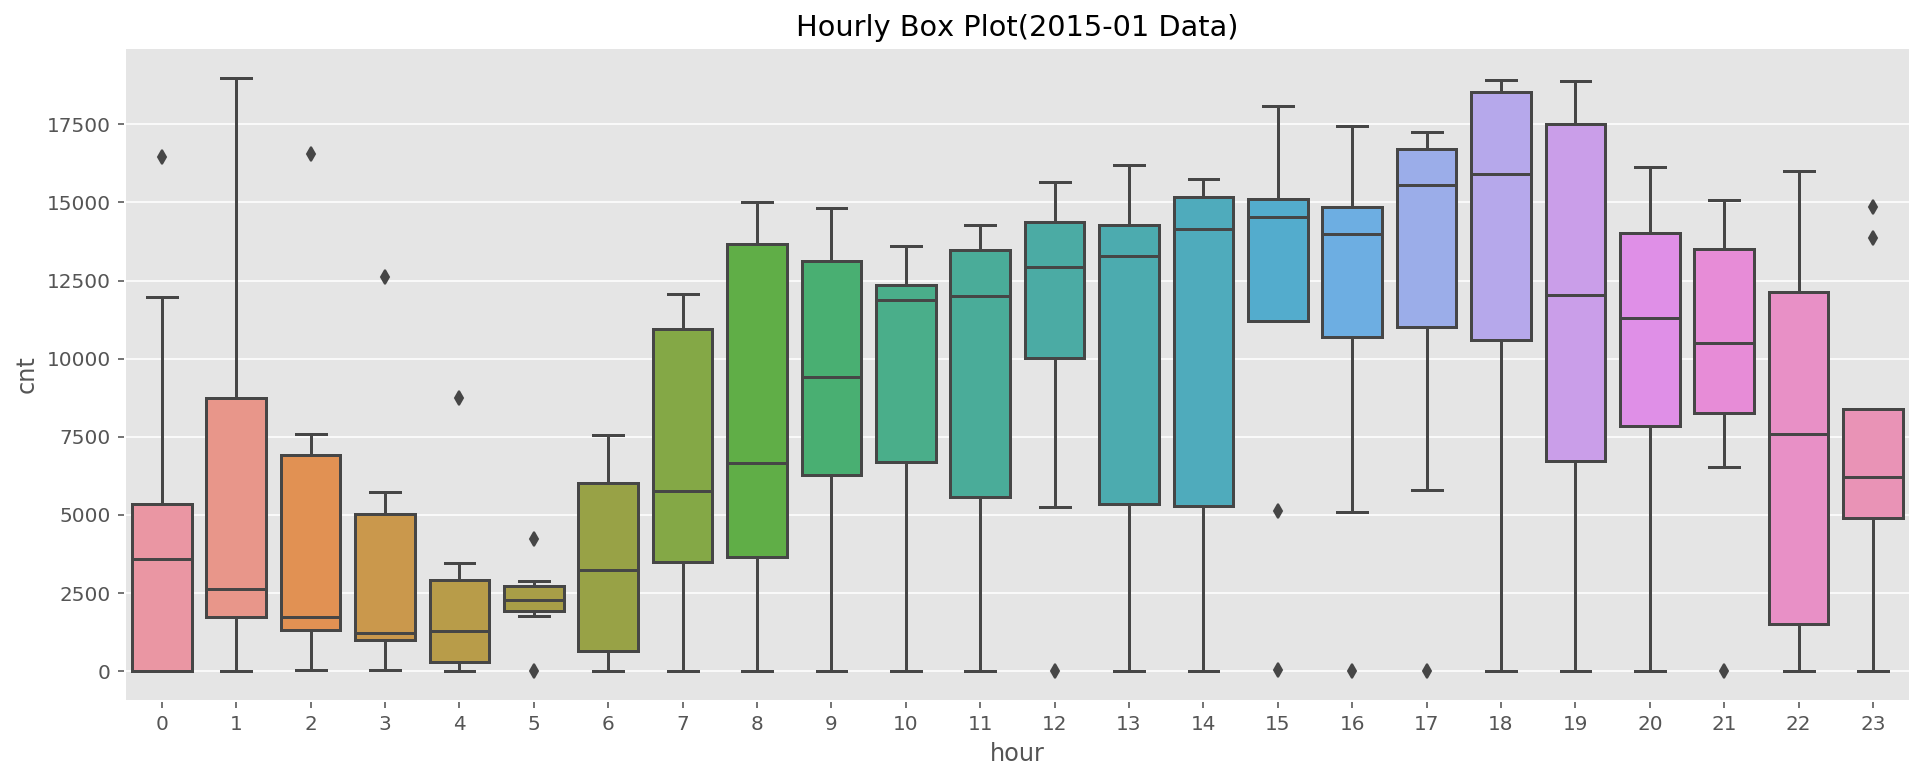

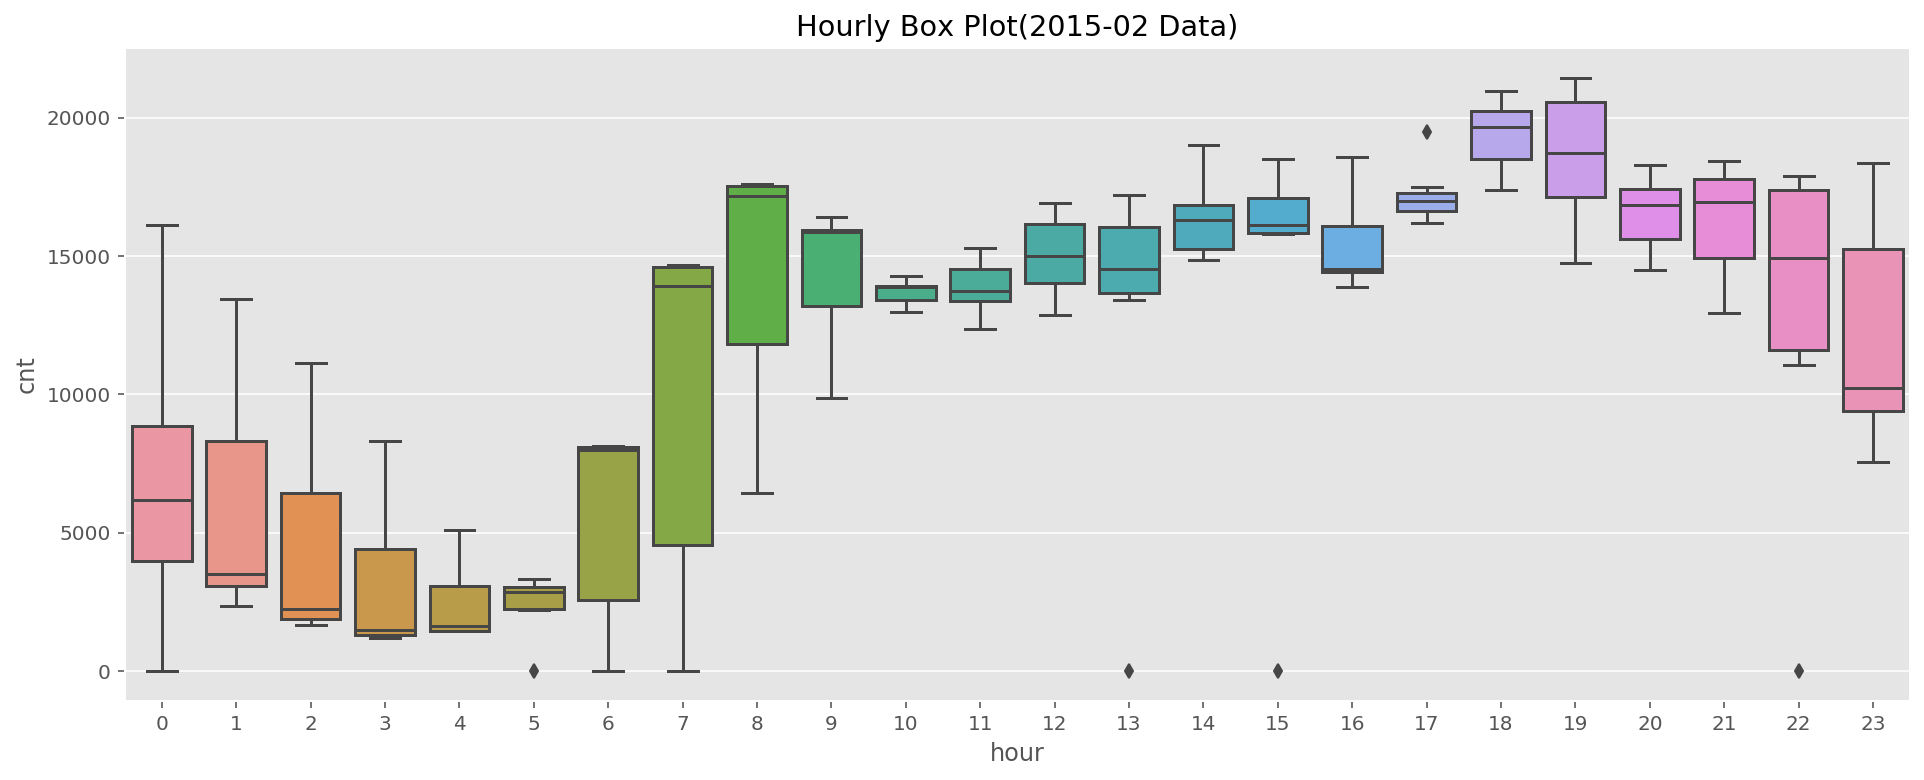

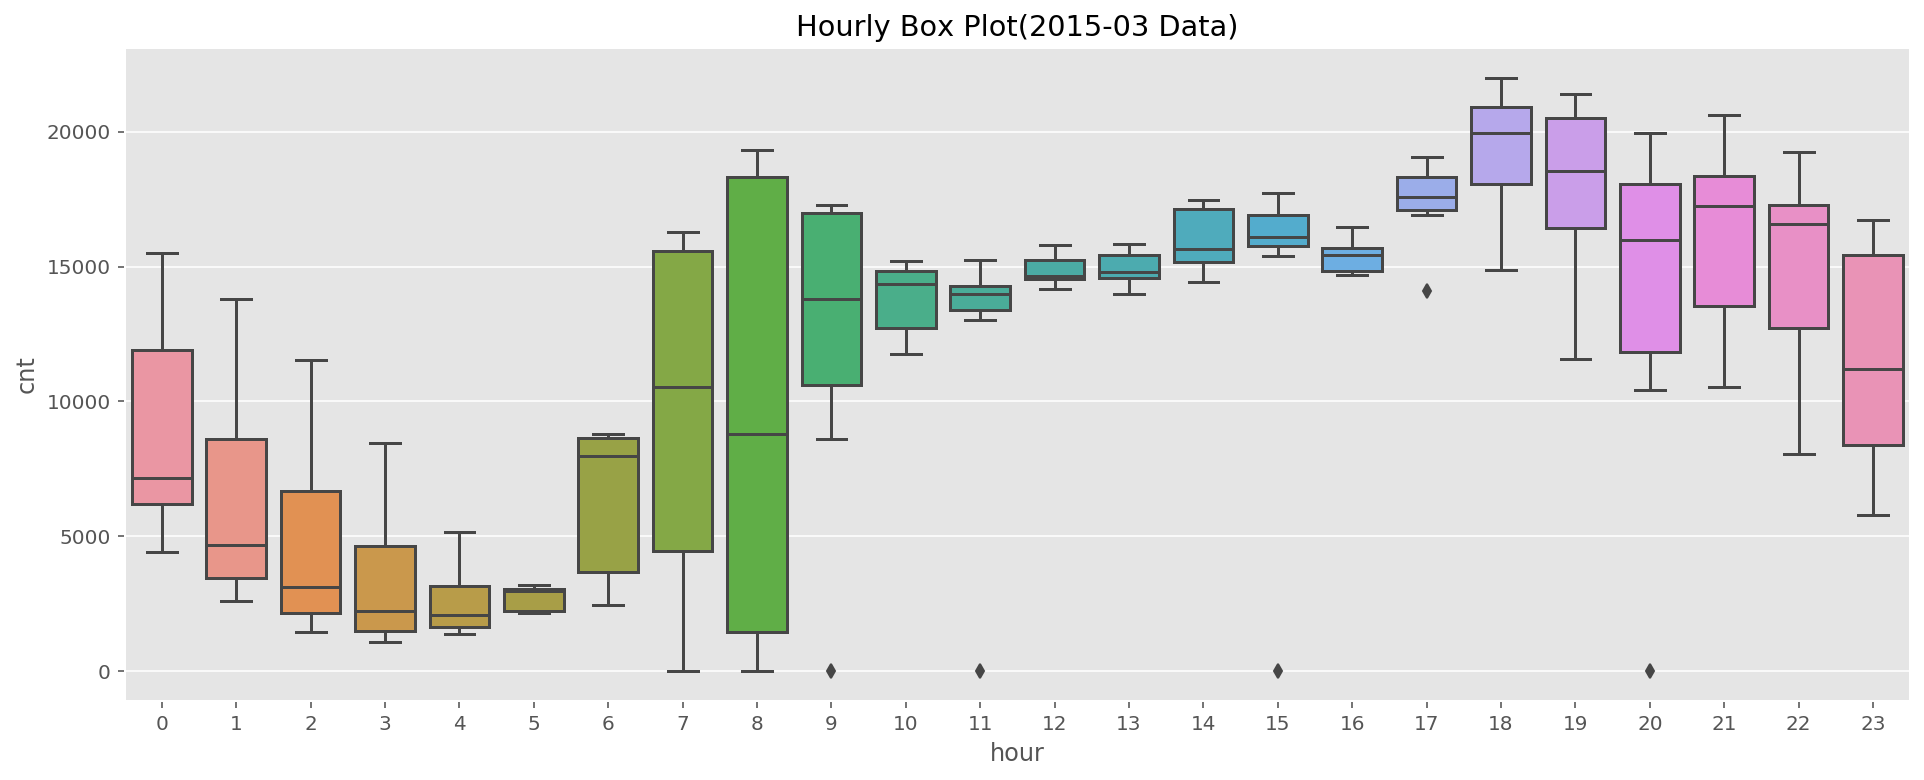

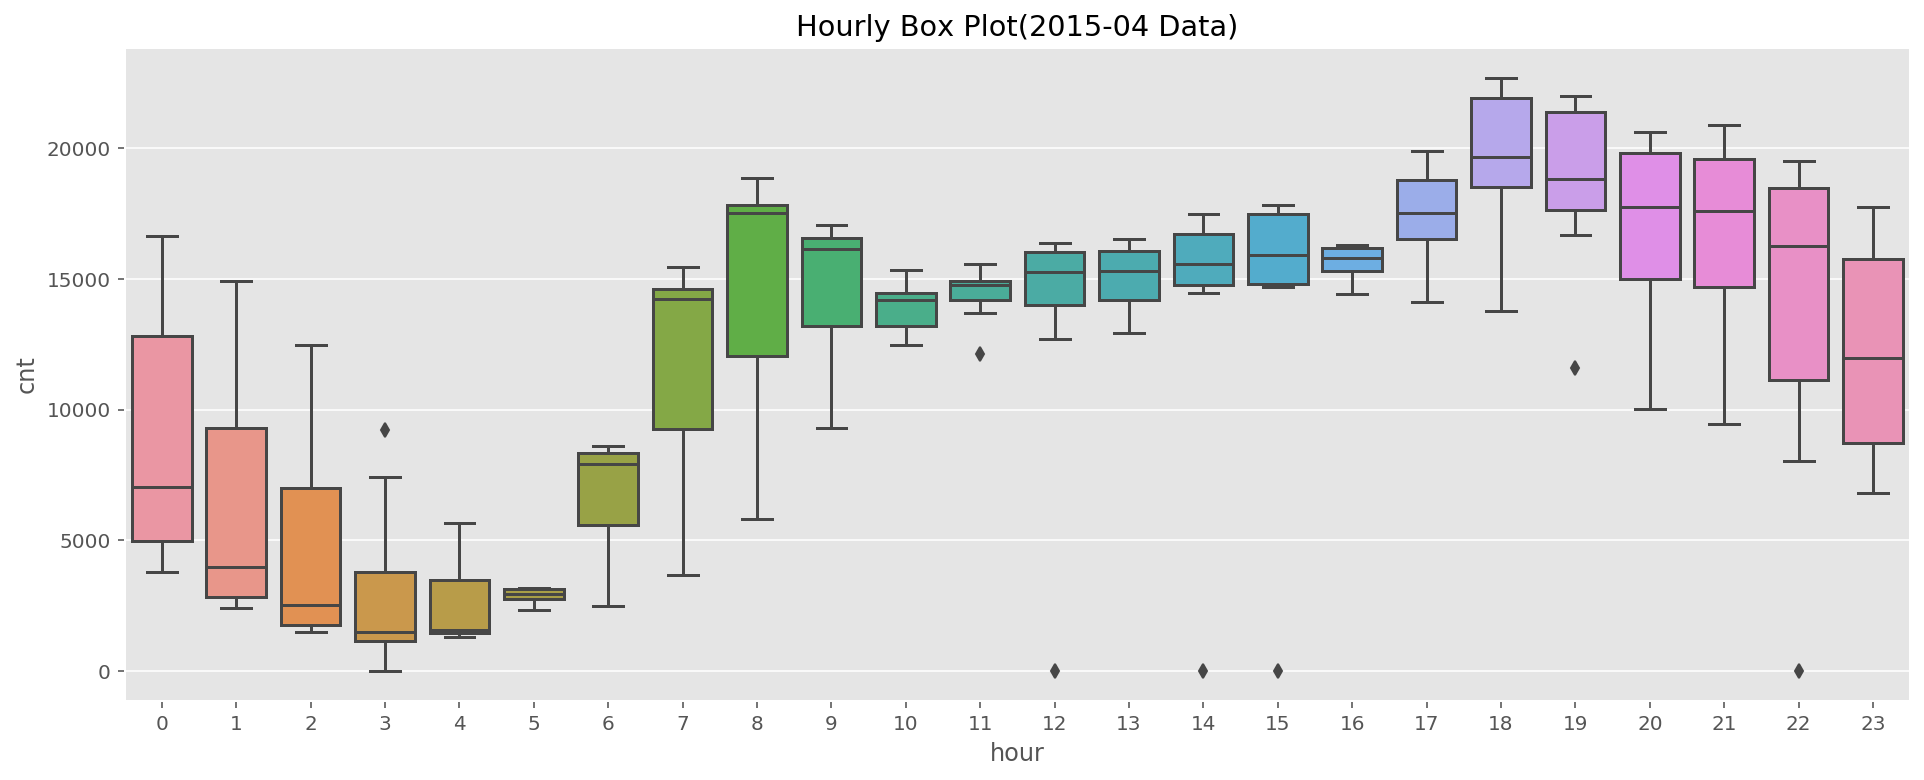

In [39]:
for week in range(1,5):
    visualize_hourly_boxplot_by_weeknum(df, 'cnt', week)

Text(0.5, 1.0, 'Hourly box plot (week 1 data)')

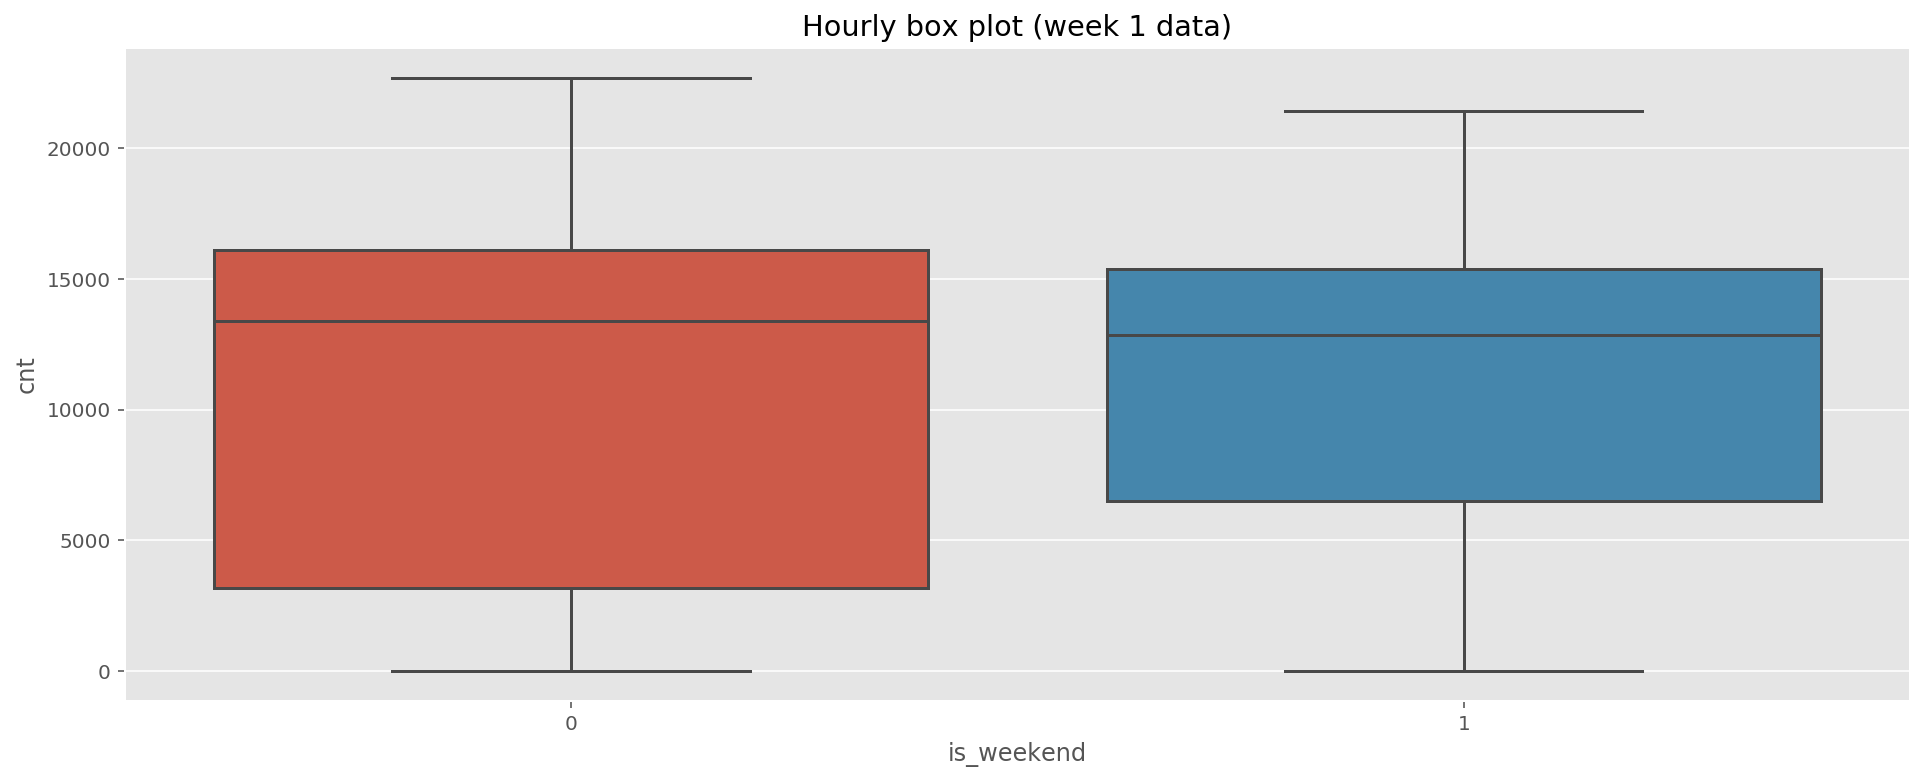

In [40]:
plt.figure(figsize=(16,6))
sns.boxplot(x='is_weekend', y='cnt', data=df)
plt.title('Hourly box plot (week 1 data)')

Text(0.5, 1.0, 'Hourly box plot (week 1 data)')

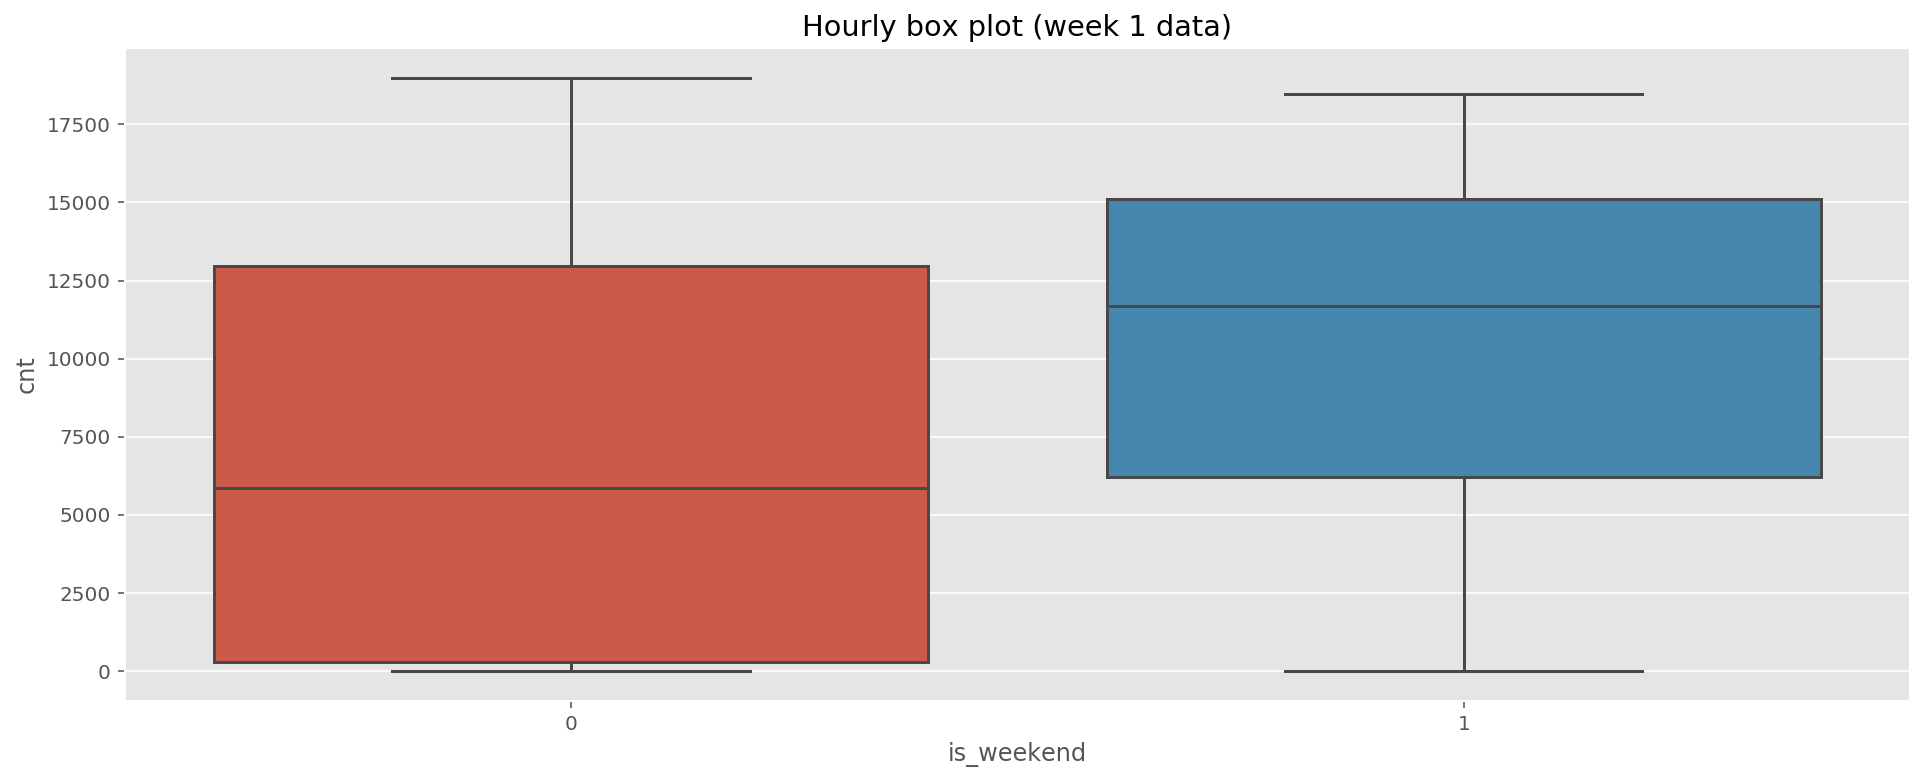

In [41]:
plt.figure(figsize=(16,6))
sns.boxplot(x='is_weekend', y='cnt', data=df[df['weeknum']==1])
plt.title('Hourly box plot (week 1 data)')

### Viloinplot
- [Violin Plots 101](https://mode.com/blog/violin-plot-examples)

In [42]:
weekday_dict = {
    0:"Monday",
    1:"Tuesday",
    2:"Wednesday",
    3:"Thursday",
    4:"Friday",
    5:"Saturday",
    6:"Sunday"
}

In [43]:
def visualize_violinplot_by_weekday(df, y, weekday):
    plt.figure(figsize=(16,6))
    sns.violinplot(x='hour', y=y, hur='weekday',data=df[df['weekday'] == weekday][['hour', 'weekday', y]], inner='quart')
    plt.title(f"{weekday_dict[weekday]}'s hourly violinplot {y} (2018-01 data)")

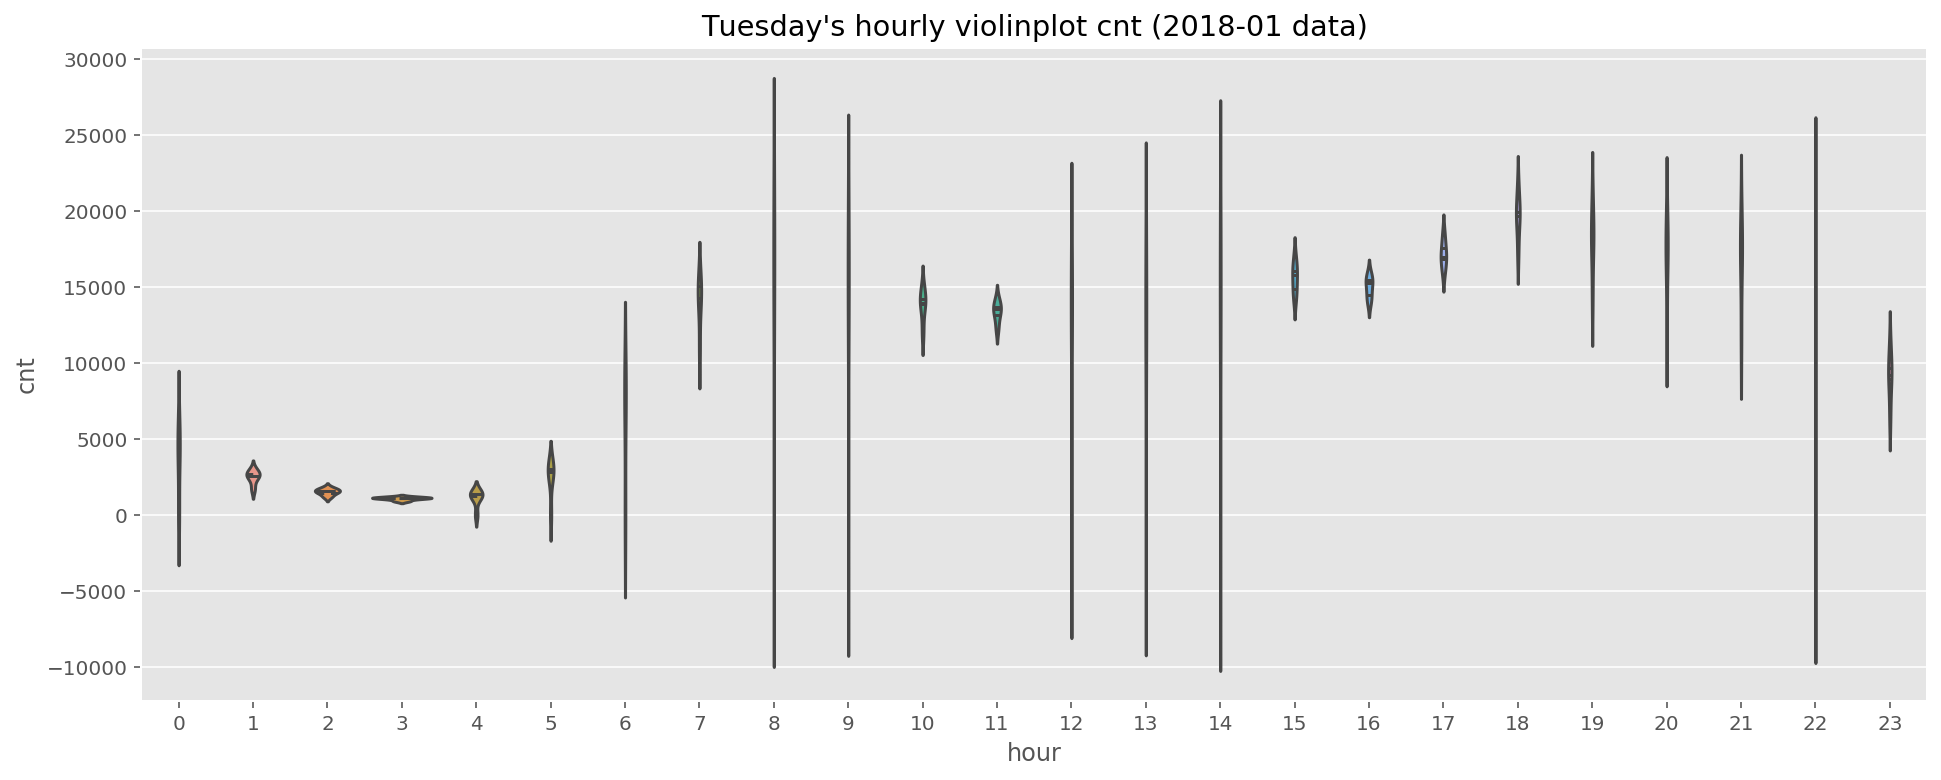

In [44]:
visualize_violinplot_by_weekday(df, 'cnt', 1)

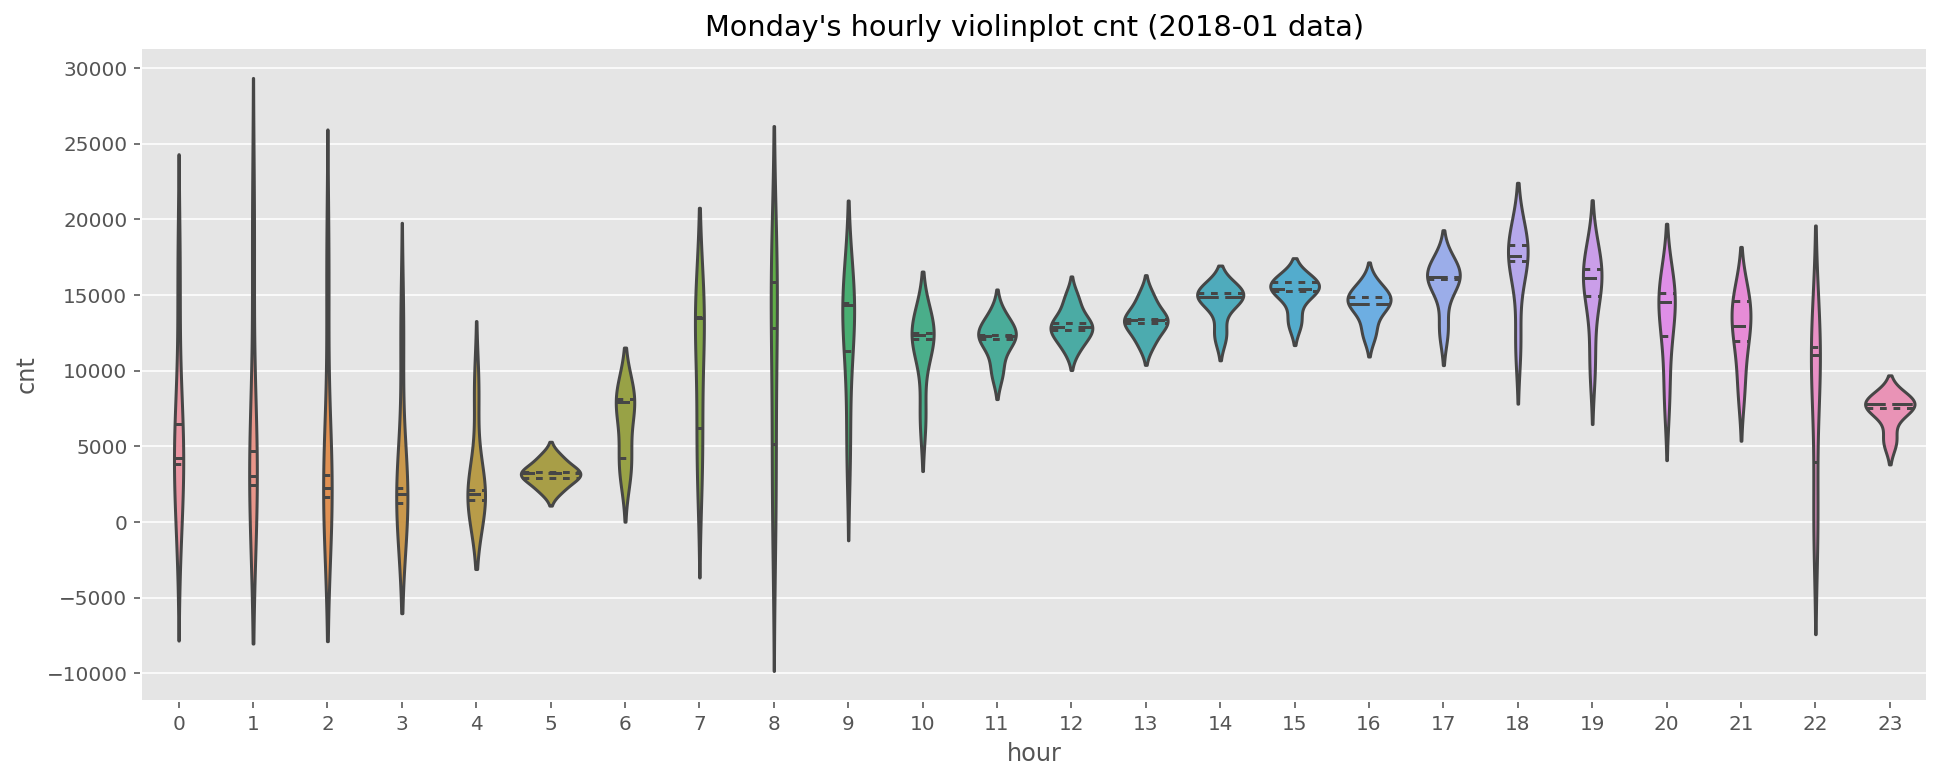

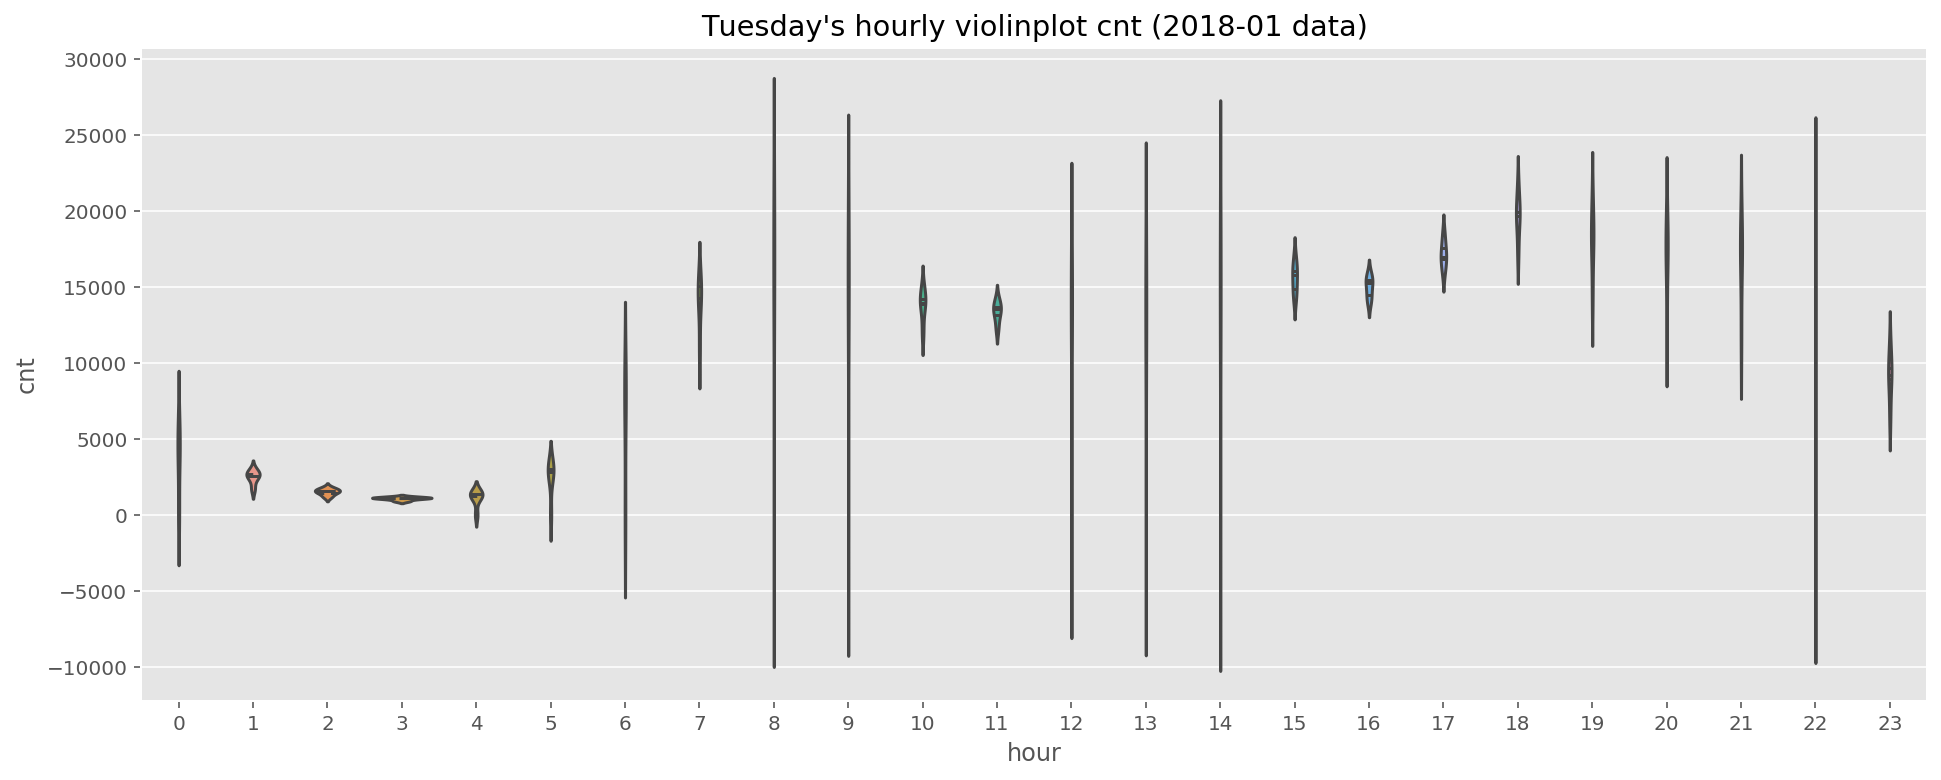

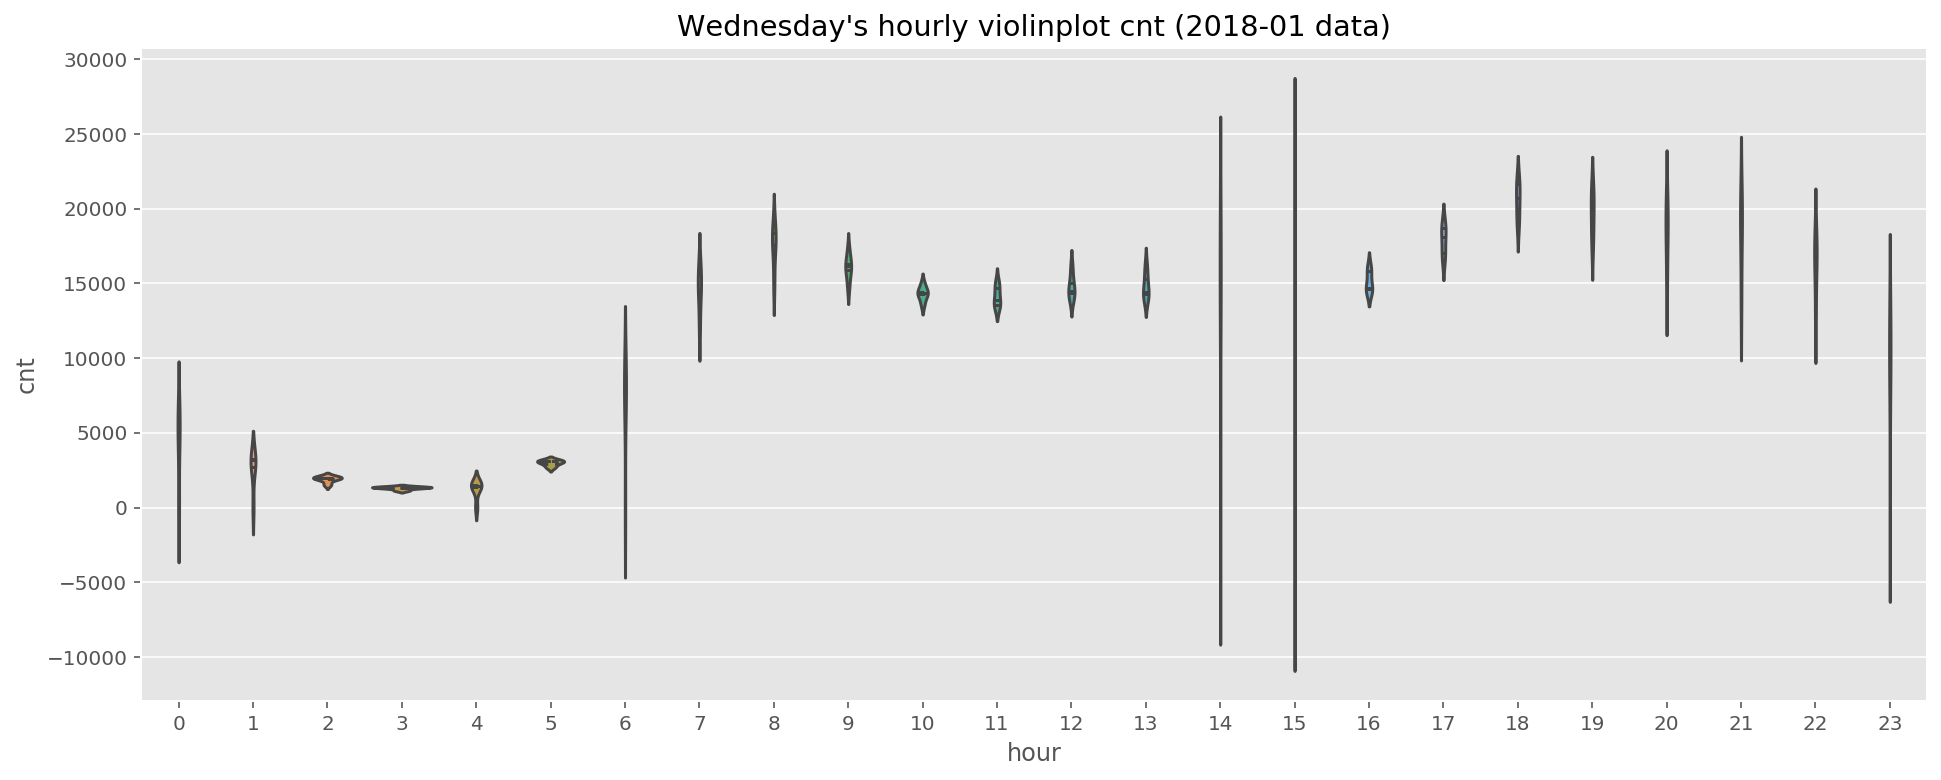

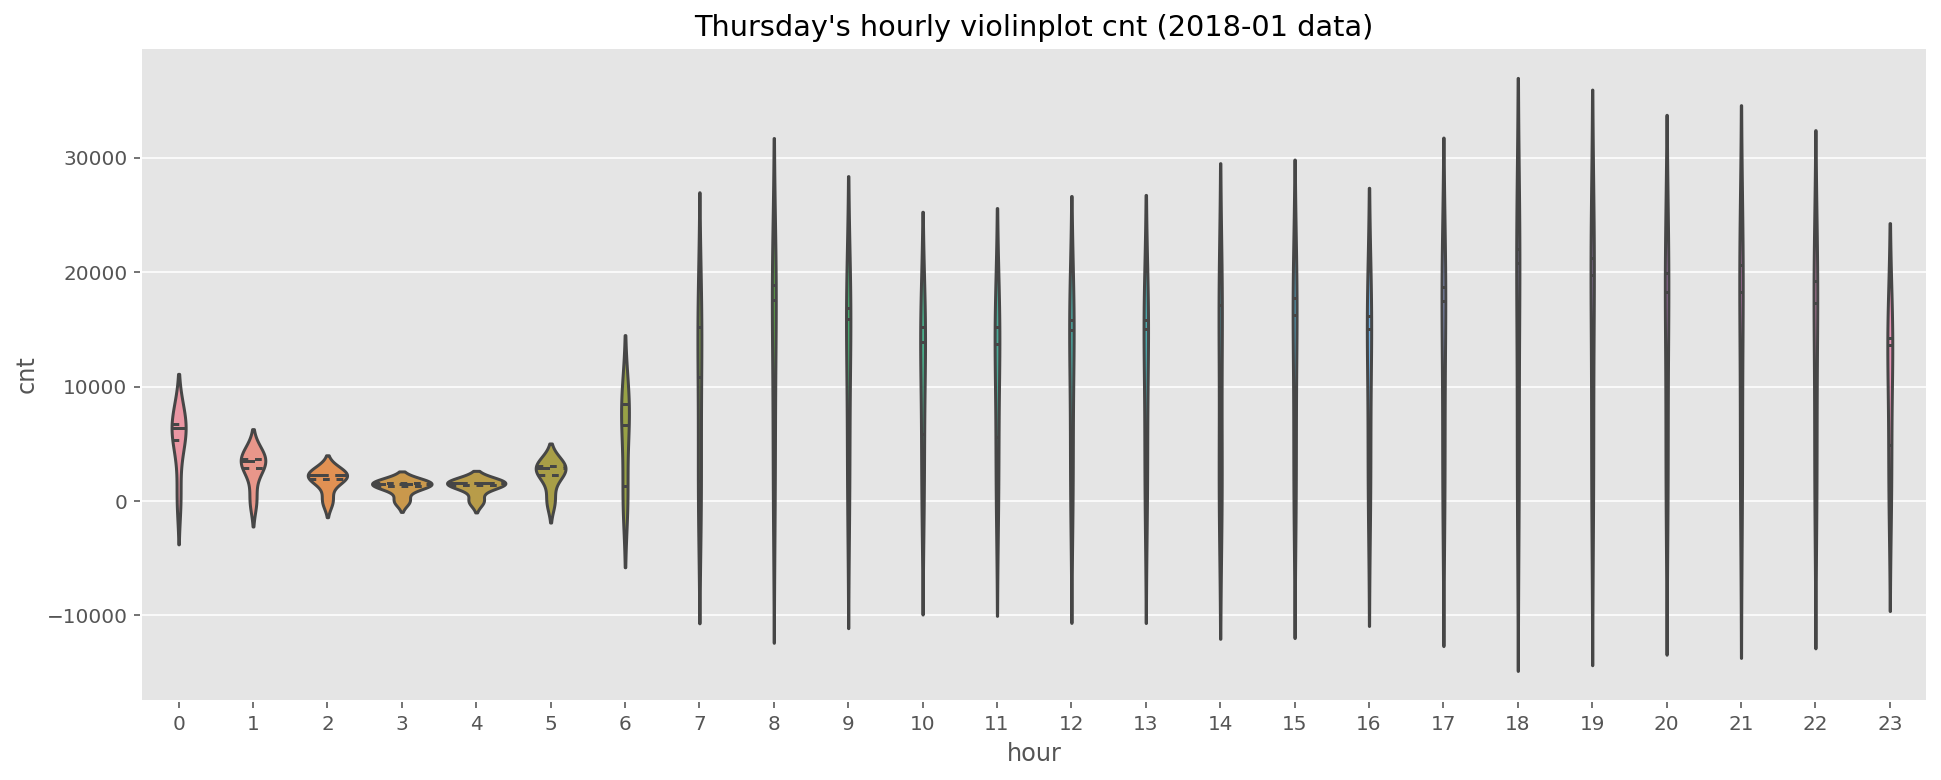

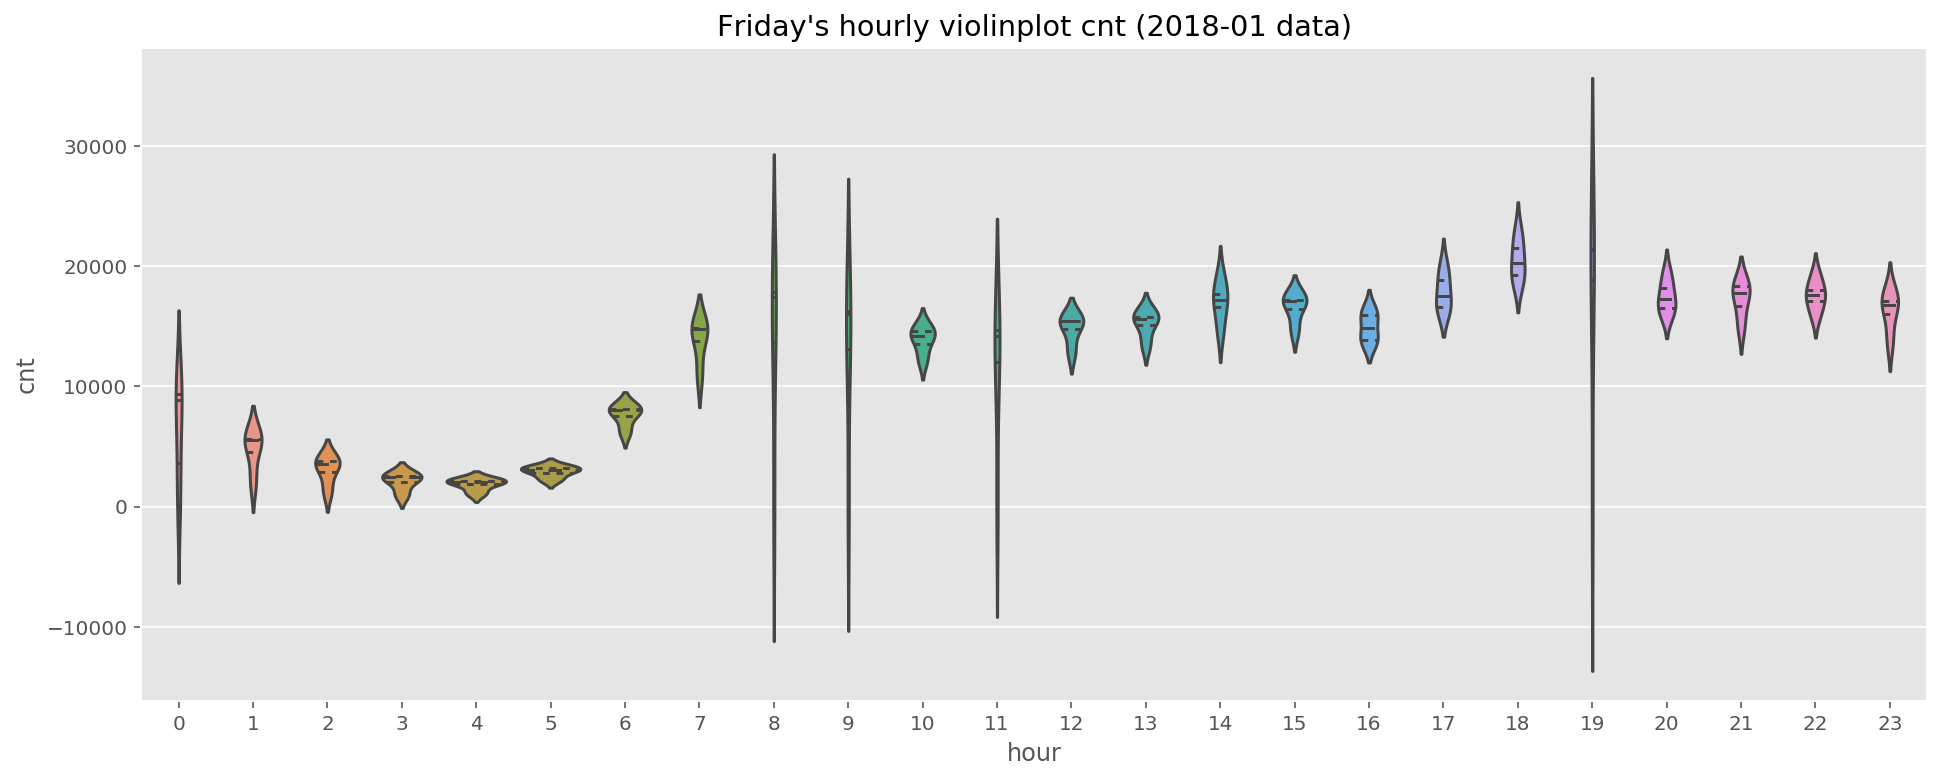

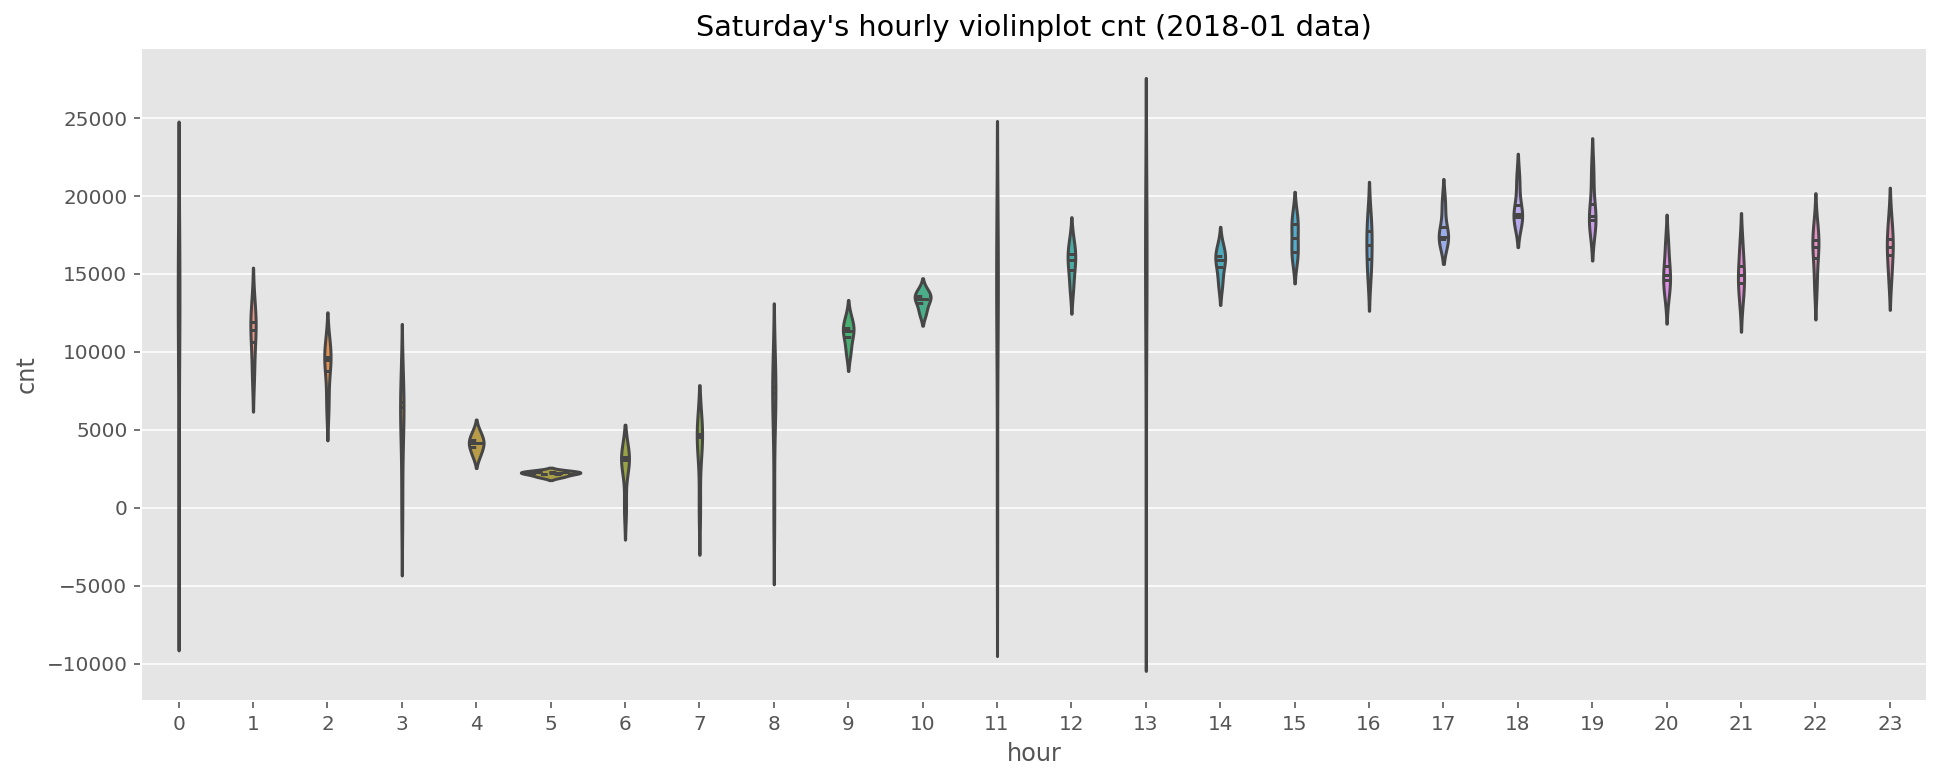

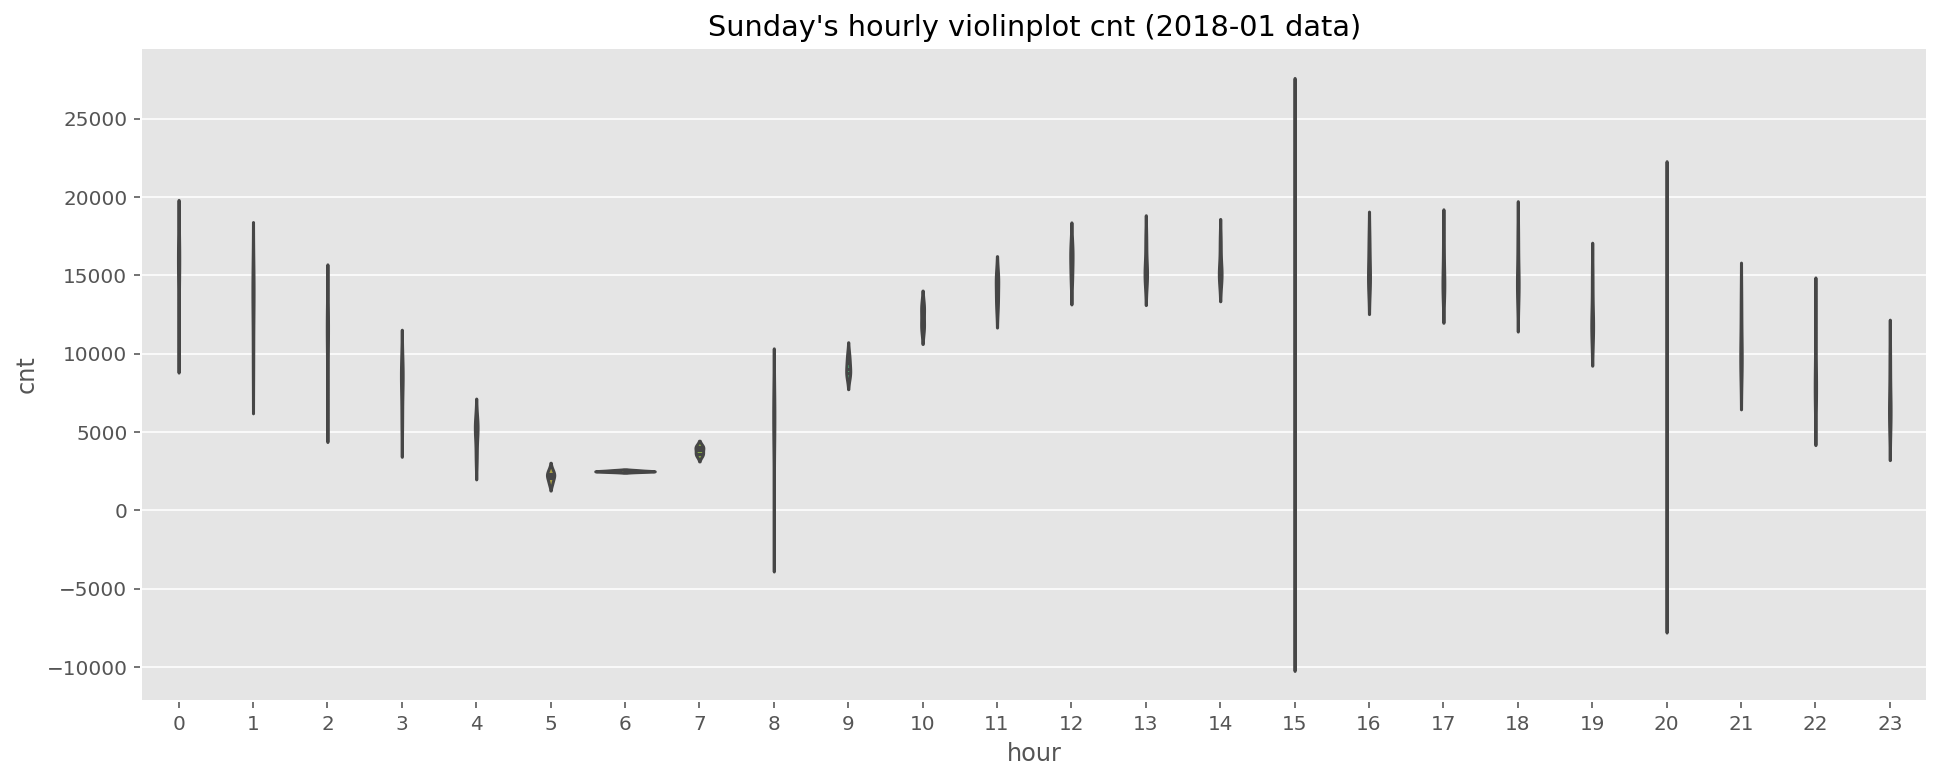

In [45]:
for weekday in range(0,7):
    visualize_violinplot_by_weekday(df, 'cnt', weekday)

### trip distance distribution 

In [46]:
# Query for Bigquery
trip_distance_query = """
SELECT 
    floor(trip_distance/30)*30 as bucket_floor,
    count(*) as count
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2018`
WHERE EXTRACT(MONTH from pickup_datetime) = 1
GROUP BY bucket_floor
ORDER BY bucket_floor
"""

trip_distance_query_log = """
SELECT 
    floor(trip_distance/30)*30 as bucket_floor,
    log10(count(*)) as count
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2018`
WHERE EXTRACT(MONTH from pickup_datetime) = 1
GROUP BY bucket_floor
ORDER BY bucket_floor
"""

In [47]:
# run query and get data from bigquery
trip_distance = bigquery_client.query(trip_distance_query) #API request
trip_distance_log = bigquery_client.query(trip_distance_query_log) #API request

In [48]:
distance_df = trip_distance.to_dataframe()
distance_log_df = trip_distance_log.to_dataframe()


In [49]:
distance_df.head()

,bucket_floor,count
0,0,8757469
1,30,3167
2,60,122
3,90,22
4,120,6


In [50]:
distance_log_df.head()

,bucket_floor,count
0,0,6.942379
1,30,3.500648
2,60,2.086360
3,90,1.342423
4,120,0.778151


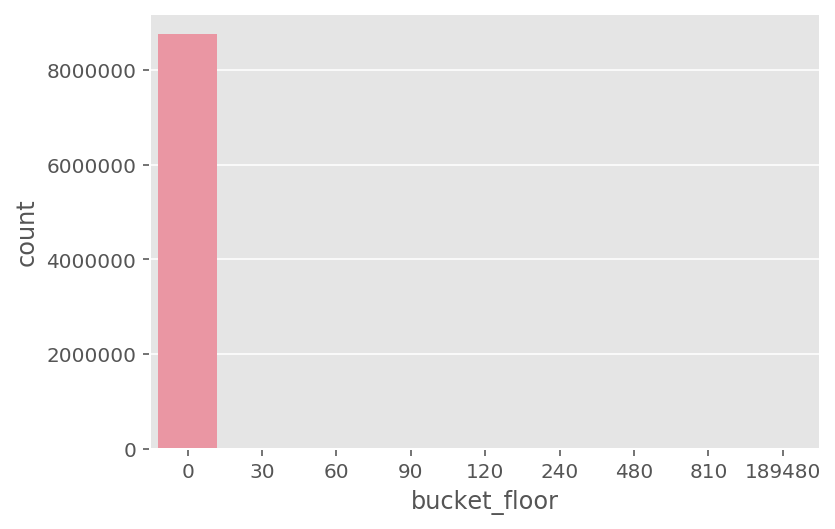

In [51]:
sns.barplot(x=distance_df['bucket_floor'], y=distance_df['count'])

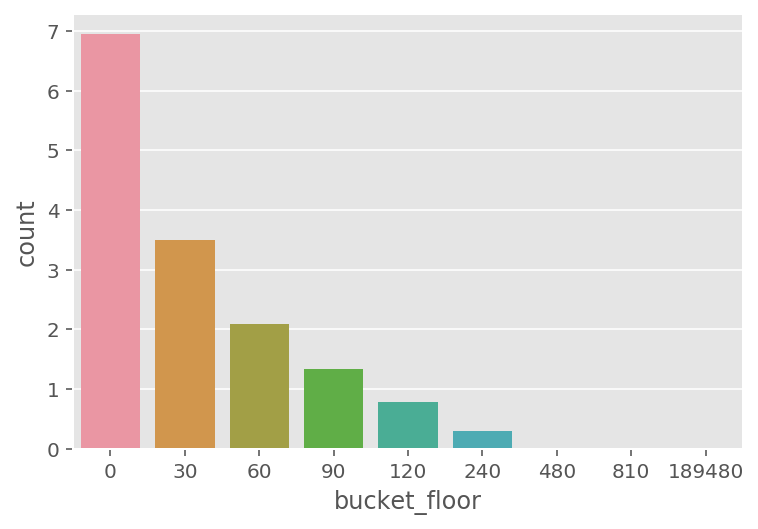

In [52]:
sns.barplot(x=distance_log_df['bucket_floor'], y=distance_log_df['count'])

In [53]:
distance_df.set_index('bucket_floor').iplot(kind='bar')

### long/short distance demand
- demand of long/short distance per times

In [54]:
short_trip_query = """
SELECT 
  EXTRACT(HOUR FROM pickup_datetime) as pickup_hour,
  EXTRACT(HOUR FROM dropoff_datetime) as dropoff_hour,
  count(*) as count
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2018` 
WHERE EXTRACT(MONTH from pickup_datetime) = 1
and trip_distance < 30
GROUP BY pickup_hour, dropoff_hour
"""

In [55]:
# run query and get data from bigquery
short_trip = bigquery_client.query(short_trip_query) #API request
short_trip_df = short_trip.to_dataframe()
short_trip_df.head()

,pickup_hour,dropoff_hour,count
0,15,0,103
1,15,15,377699
2,8,8,322711
3,8,9,94668
4,21,21,375454


In [56]:
long_trip_query = """
SELECT 
  EXTRACT(HOUR FROM pickup_datetime) as pickup_hour,
  EXTRACT(HOUR FROM dropoff_datetime) as dropoff_hour,
  count(*) as count
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2018` 
WHERE EXTRACT(MONTH from pickup_datetime) = 1
and trip_distance > 30
GROUP BY pickup_hour, dropoff_hour
"""

In [57]:
# run query and get data from bigquery
long_trip = bigquery_client.query(long_trip_query) #API request
long_trip_df = long_trip.to_dataframe()
long_trip_df.head()

,pickup_hour,dropoff_hour,count
0,21,21,27
1,5,6,54
2,12,13,109
3,14,16,46
4,0,0,32


In [58]:
trip_df = short_trip_df.merge(long_trip_df, on=["pickup_hour", "dropoff_hour"], suffixes=["_short", "_long"]) \
                       .rename(columns={"count_short":"short_trips", "count_long":"long_trips"})

In [59]:
trip_df.head()

,pickup_hour,dropoff_hour,short_trips,long_trips
0,15,0,103,1
1,15,15,377699,14
2,8,8,322711,16
3,8,9,94668,81
4,21,21,375454,27


In [60]:
trip_df_pickup = trip_df.groupby(["pickup_hour"], as_index=False).agg({'short_trips':'sum', 'long_trips':'sum'}) \
                                                                      .sort_values(by="pickup_hour")
trip_df_dropoff = trip_df.groupby(["dropoff_hour"], as_index=False).agg({'short_trips':'sum', 'long_trips':'sum'}) \
                                                                      .sort_values(by="dropoff_hour")

In [61]:
trip_df_pickup.head()

,pickup_hour,short_trips,long_trips
0,0,259238,138
1,1,188615,93
2,2,141858,75
3,3,17848,46
4,4,79181,66


In [62]:
def plt_clock(ax, radii, title, color): # https://www.fastcampus.co.kr/courses/200681/clips/
    N = 24
    bottom = 2

    # 24시간을 위한 theta 생성
    theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)

    # plot의 각각의 bin width 지정
    width = 2*np.pi / N
    
    bars = ax.bar(theta, radii, width=width, bottom=bottom, color=color, edgecolor="#999999")

    # label을 시계 방향으로 설정하고 위에서 시작
    ax.set_theta_zero_location("N")
    # 시계 방향 설정
    ax.set_theta_direction(-1)

    # label 설정
    ax.set_xticks(theta)
    ticks = ["{}:00".format(x) for x in range(24)]
    ax.set_xticklabels(ticks)
    ax.set_title(title)

In [63]:
def diff_short_long_trip_on_time(trip_df_pickup, trip_df_dropoff): # https://www.fastcampus.co.kr/courses/200681/clips/
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,18))

    # 2, 2의 첫번째에 그림
    ax = plt.subplot(2,2,1, polar=True)
    # 24시간의 각각의 bin에 히스토그램 그림
    radii = np.array(trip_df_pickup['short_trips'].tolist(), dtype="int64")
    title = "Pickup Time for Short Trips"
    plt_clock(ax, radii, title, "#dc143c")

    # 2, 2의 두번째에 그림
    ax = plt.subplot(2,2,2, polar=True)
    # 24시간의 각각의 bin에 히스토그램 그림
    radii = np.array(trip_df_pickup['long_trips'].tolist(), dtype="int64")
    title = "Pickup Time for Long Trips"
    plt_clock(ax, radii, title, "#56B4E9")

    ax = plt.subplot(2,2,3, polar=True)
    radii = np.array(trip_df_dropoff['short_trips'].tolist(), dtype="int64")
    title = "Dropoff Time for Short Trips"
    plt_clock(ax, radii, title, "#dc143c")

    ax = plt.subplot(2,2,4, polar=True)
    radii = np.array(trip_df_dropoff['long_trips'].tolist(), dtype="int64")
    title = "Dropoff Time for Long Trips"
    plt_clock(ax, radii, title, "#56B4E9")

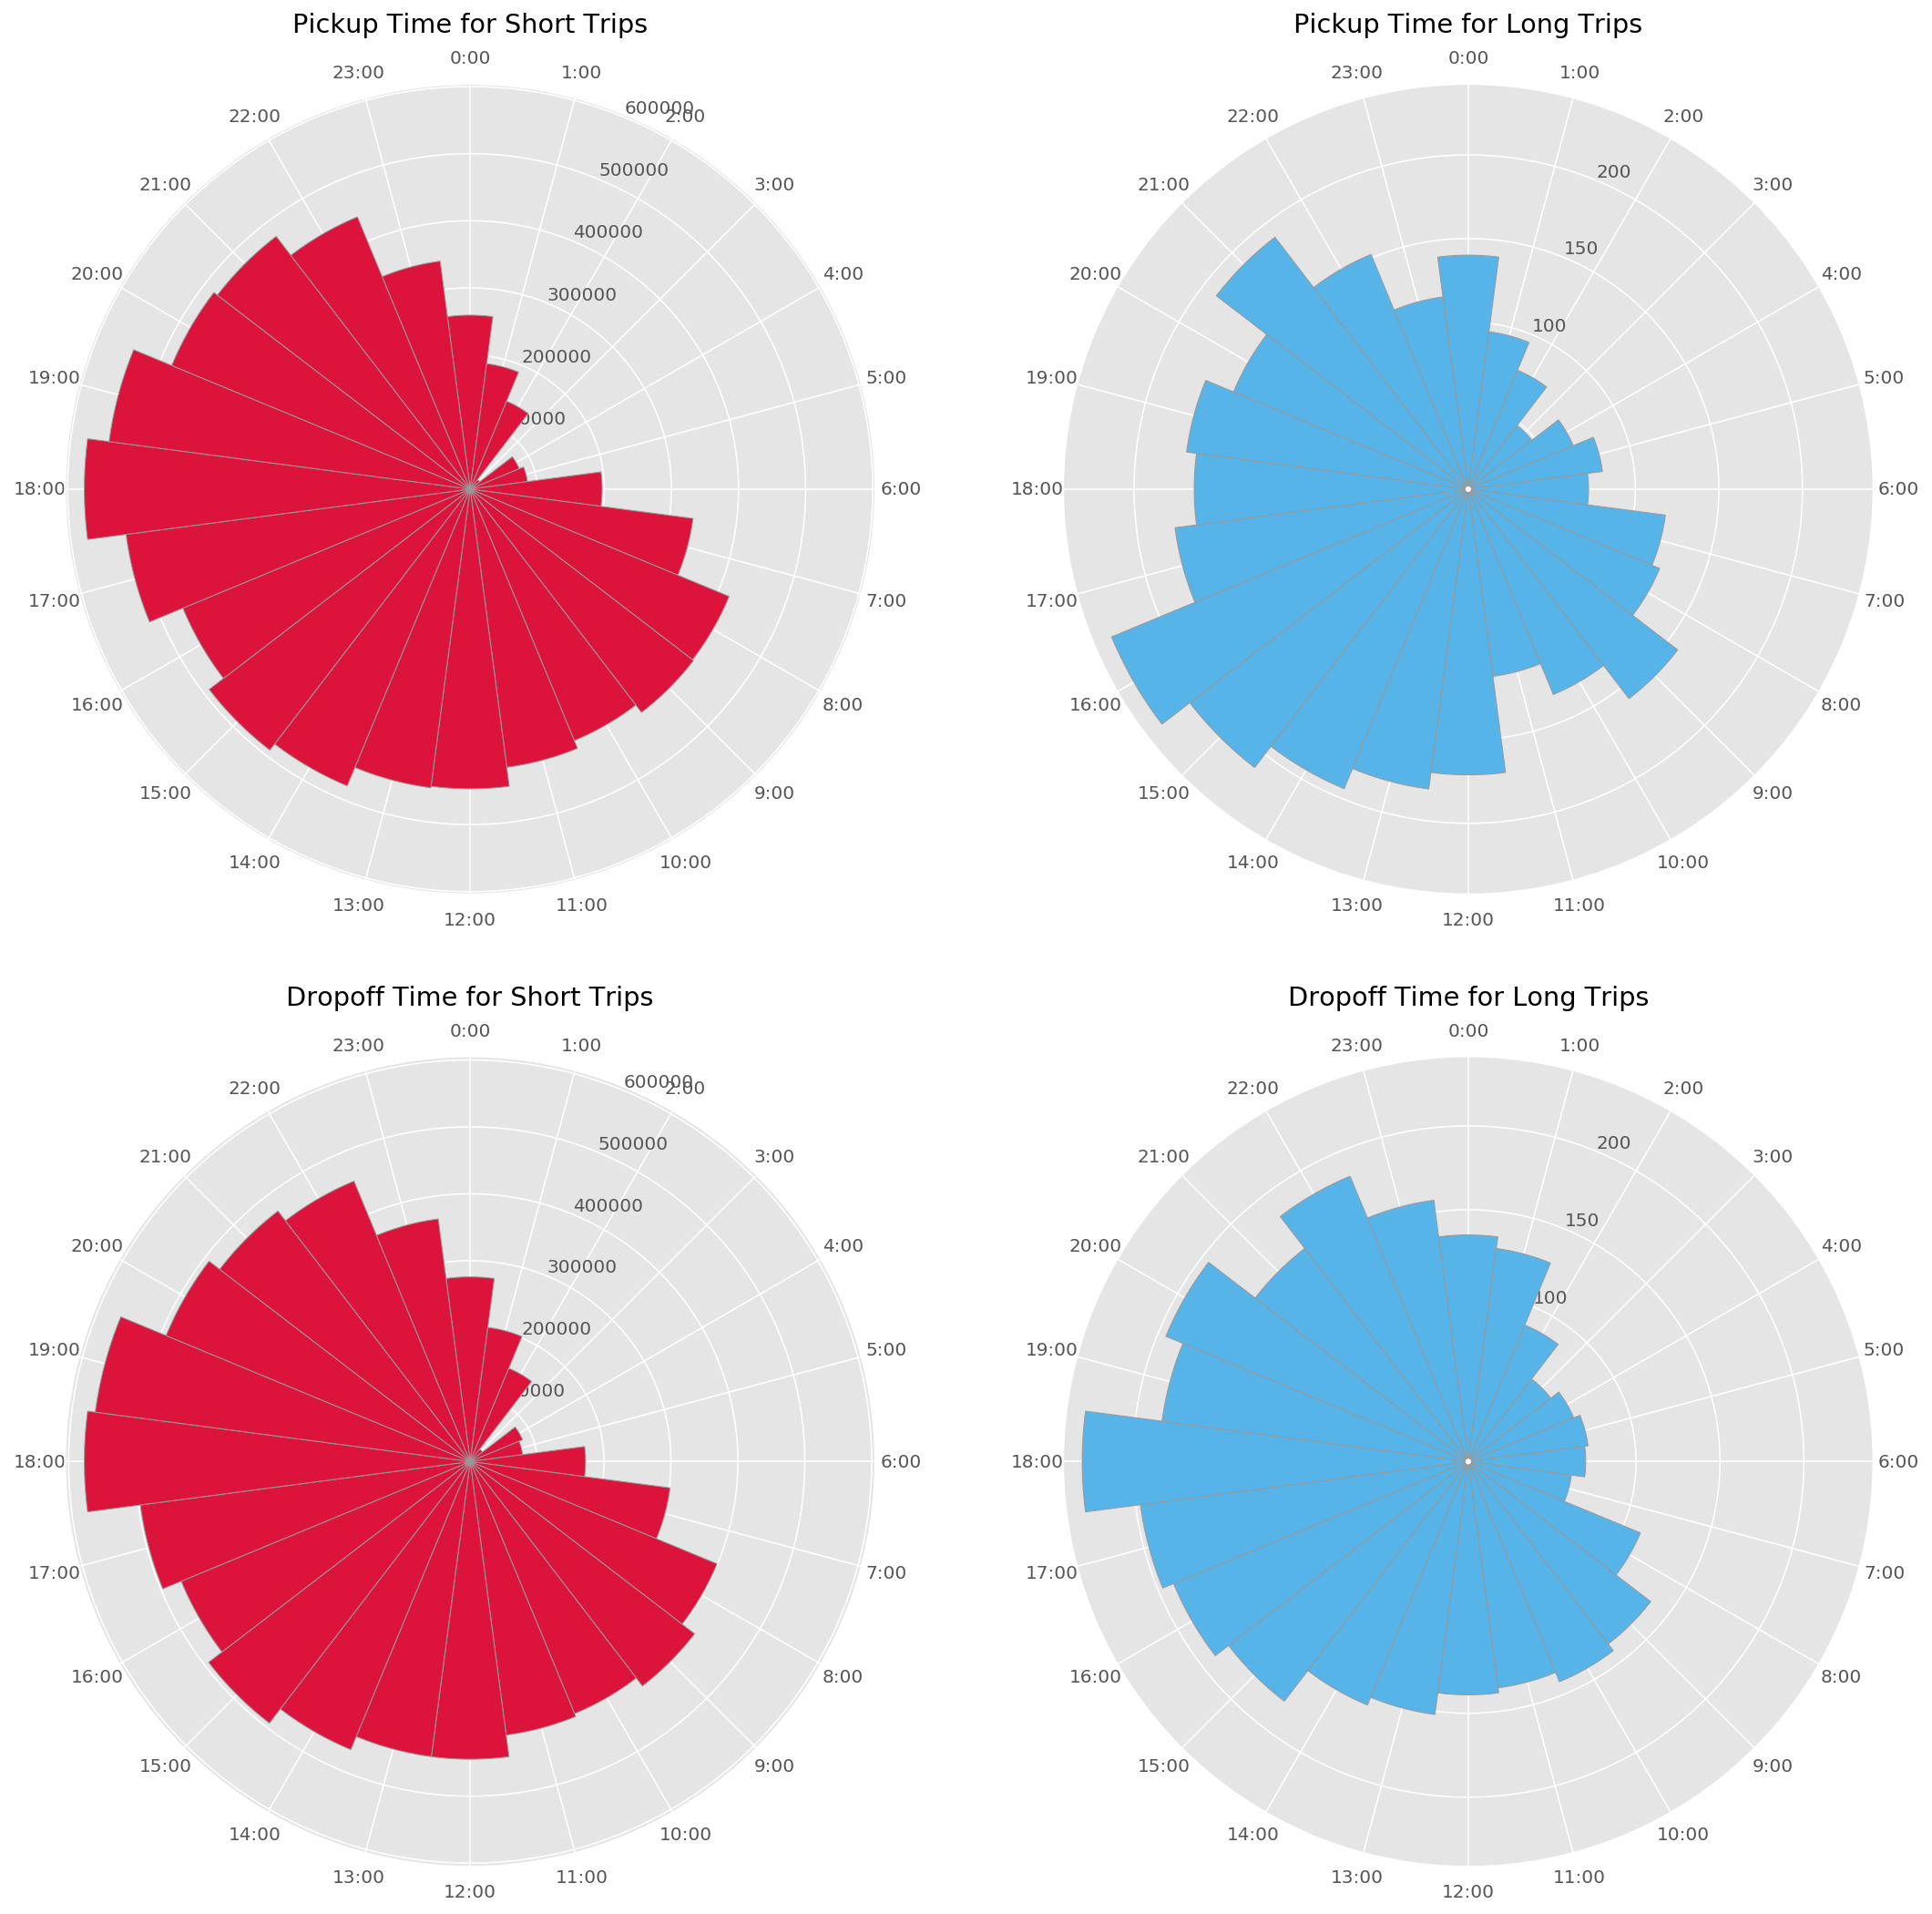

In [64]:
diff_short_long_trip_on_time(trip_df_pickup, trip_df_dropoff)